In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
dataset = pd.read_excel('Company_x.xlsx')
df = dataset.copy()

In [3]:
df.head()

EntityID OriginalCreditor[Redacted]  AccountID  CurrentBalance  \
0       932                 Creditor 1       3677             0.0   
1       160                 Creditor 2       4276           182.9   
2       932                 Creditor 1       8525             0.0   
3       160                 Creditor 2       9859          8279.5   
4       932                 Creditor 1      12807             0.0   

   DebtLoadPrincipal  BalanceAtDebtLoad  PurchasePrice ProductOrDebtType  \
0            1160.20            1160.20           4.22             Other   
1             182.90             182.90           4.22             Other   
2             538.57             538.57           4.22             Other   
3            8279.50            8279.50           4.22             Other   
4             523.00             523.00           4.22             Other   

      CollectionStatus IsStatBarred  ... AccountInsolvencyType  \
0         PAID_IN_FULL            N  ...                   NaN   
1  CANCELLED_WITHDRAWN            Y  ...                   NaN   
2         PAID_IN_FULL            N  ...                   NaN   
3              PASSIVE            Y  ...                   NaN   
4         PAID_IN_FULL            Y  ...                   NaN   

  CustomerInsolvencyType IsLegal LastPaymentAmount LastPaymentMethod  \
0                    NaN       Y             10.00            Cheque   
1                    NaN       N               NaN               NaN   
2                    NaN       N              5.37            Cheque   
3                    NaN       N               NaN               NaN   
4                    NaN       Y              5.00            Cheque   

   NumLiableParties CustomerAge  NumPhones  NumEmails  NumAddresses  
0               1.0        53.0          0          0             1  
1               1.0         NaN          0          0             1  
2               1.0         NaN          1          0             1  
3               1.0         NaN          1          0             1  
4               1.0        46.0          2          0             1  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

In [5]:
df.drop(['EntityID', 'AccountID'], axis=1, inplace=True)

In [6]:
# rename columns
df.rename(columns={'OriginalCreditor[Redacted]':'OriginalCreditor_Redacted'}, inplace=True)

In [7]:
df[df.duplicated()]

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
236                   Creditor 7           23.00              20.70   
272                   Creditor 7           20.00              18.00   
283                   Creditor 7           23.00              20.70   
294                   Creditor 7           45.00              40.50   
296                   Creditor 7           23.00              20.70   
...                          ...             ...                ...   
352653               Creditor 48          903.31             821.19   
357599               Creditor 48         1316.88            1197.16   
357799               Creditor 48          939.47             854.06   
357822               Creditor 48          240.55             218.68   
397085               Creditor 50         2205.14            2177.83   

        BalanceAtDebtLoad  PurchasePrice        ProductOrDebtType  \
236                 23.00           4.22                    Other   
272                 20.00           4.22                    Other   
283                 23.00           4.22                    Other   
294                 45.00           4.22                    Other   
296                 23.00           4.22                    Other   
...                   ...            ...                      ...   
352653             821.19           5.72  Utilities/Telco - Other   
357599            1197.16           5.72  Utilities/Telco - Other   
357799             854.06           5.72  Utilities/Telco - Other   
357822             218.68           5.72  Utilities/Telco - Other   
397085            2177.83           7.38  Finance Company - Other   

       CollectionStatus IsStatBarred ClosureReason InBankruptcy  \
236             PASSIVE            Y           NaN            N   
272             PASSIVE            Y           NaN            N   
283             PASSIVE            Y           NaN            N   
294             PASSIVE            Y           NaN            N   
296             PASSIVE            Y           NaN            N   
...                 ...          ...           ...          ...   
352653           ACTIVE            Y           NaN            N   
357599           ACTIVE            Y           NaN            N   
357799           ACTIVE            Y           NaN            N   
357822           ACTIVE            Y           NaN            N   
397085           ACTIVE            N           NaN            N   

       AccountInsolvencyType CustomerInsolvencyType IsLegal  \
236                      NaN                    NaN       N   
272                      NaN                    NaN       N   
283                      NaN                    NaN       N   
294                      NaN                    NaN       N   
296                      NaN                    NaN       N   
...                      ...                    ...     ...   
352653                   NaN                    NaN       N   
357599                   NaN                    NaN       N   
357799                   NaN                    NaN       N   
357822                   NaN                    NaN       N   
397085                   NaN                    NaN       N   

        LastPaymentAmount LastPaymentMethod  NumLiableParties  CustomerAge  \
236                   NaN               NaN               1.0         47.0   
272                   NaN               NaN               1.0         28.0   
283                   NaN               NaN               1.0         52.0   
294                   NaN               NaN               1.0         45.0   
296                   NaN               NaN               1.0         52.0   
...                   ...               ...               ...          ...   
352653                NaN               NaN               1.0         32.0   
357599                NaN               NaN               1.0         28.0   
357799                NaN               NaN               1.0

In [8]:
df = df.drop_duplicates()

In [9]:
df[['OriginalCreditor_Redacted']]

OriginalCreditor_Redacted
0                     Creditor 1
1                     Creditor 2
2                     Creditor 1
3                     Creditor 2
4                     Creditor 1
...                          ...
406418               Creditor 50
406419               Creditor 50
406420               Creditor 50
406421               Creditor 50
406422               Creditor 50

[392738 rows x 1 columns]

In [10]:
# !pip install category_encoders

import category_encoders as ce

# Create a BinaryEncoder instance
binary_encoder = ce.BinaryEncoder(cols=['OriginalCreditor_Redacted'])

# Fit and transform the encoder to your data
encoded_data = binary_encoder.fit_transform(df)

In [11]:
encoded_data

OriginalCreditor_Redacted_0  OriginalCreditor_Redacted_1  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
...                             ...                          ...   
406418                            1                            1   
406419                            1                            1   
406420                            1                            1   
406421                            1                            1   
406422                            1                            1   

        OriginalCreditor_Redacted_2  OriginalCreditor_Redacted_3  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
...                             ...                          ...   
406418                            0                            0   
406419                            0                            0   
406420                            0                            0   
406421                            0                            0   
406422                            0                            0   

        OriginalCreditor_Redacted_4  OriginalCreditor_Redacted_5  \
0                                 0                            1   
1                                 1                            0   
2                                 0                            1   
3                                 1                            0   
4                                 0                            1   
...                             ...                          ...   
406418                            1                            0   
406419                            1                            0   
406420                            1                            0   
406421                            1                            0   
406422                            1                            0   

        CurrentBalance  DebtLoadPrincipal  BalanceAtDebtLoad  PurchasePrice  \
0                 0.00            1160.20            1160.20           4.22   
1               182.90             182.90             182.90           4.22   
2                 0.00             538.57             538.57           4.22   
3              8279.50            8279.50            8279.50           4.22   
4                 0.00             523.00             523.00           4.22   
...                ...                ...                ...            ...   
406418          448.20             448.20             448.20           7.38   
406419         1678.37            1678.37            1678.37           7.38   
406420         3512.60            3512.60            3512.60           7.38   
406421         4477.31            4477.31            4477.31           7.38   
406422          272.59             272.59             272.59           7.38   

        ... AccountInsolvencyType CustomerInsolvencyType IsLegal  \
0       ...                   NaN                    NaN       Y   
1       ...                   NaN                    NaN       N   
2       ...                   NaN                    NaN       N   
3       ...                   NaN                    NaN       N   
4       ...                   NaN                    NaN       Y   
...     ...                   ...                    ...     ...   
406418  ...                   NaN                    NaN       N   
406419  ...                   NaN                    NaN       N

In [12]:
# Calculate the frequency of each category
category_counts = df['OriginalCreditor_Redacted'].value_counts()

# Assign a value to each category based on its frequency
def frequency_encode(category):
    return category_counts[category] / len(df)

# Replace the original categorical values with the frequency encoded values
df['FrequencyEncodedCreditor'] = df['OriginalCreditor_Redacted'].apply(frequency_encode)

In [13]:
df[['OriginalCreditor_Redacted', 'FrequencyEncodedCreditor']]

OriginalCreditor_Redacted  FrequencyEncodedCreditor
0                     Creditor 1                  0.000020
1                     Creditor 2                  0.000015
2                     Creditor 1                  0.000020
3                     Creditor 2                  0.000015
4                     Creditor 1                  0.000020
...                          ...                       ...
406418               Creditor 50                  0.033709
406419               Creditor 50                  0.033709
406420               Creditor 50                  0.033709
406421               Creditor 50                  0.033709
406422               Creditor 50                  0.033709

[392738 rows x 2 columns]

In [14]:
df.columns

Index(['OriginalCreditor_Redacted', 'CurrentBalance', 'DebtLoadPrincipal',
       'BalanceAtDebtLoad', 'PurchasePrice', 'ProductOrDebtType',
       'CollectionStatus', 'IsStatBarred', 'ClosureReason', 'InBankruptcy',
       'AccountInsolvencyType', 'CustomerInsolvencyType', 'IsLegal',
       'LastPaymentAmount', 'LastPaymentMethod', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses',
       'FrequencyEncodedCreditor'],
      dtype='object')

ProductOrDebtType : 
Utilities/Telco - Other    207112
Other                       75587
Finance Company - Other     48693
Store Cards                 17699
Credit Cards                16885
Bank - Other                13030
Residential Electricity      7693
Personal Loans               4309
Loans                        1260
Hire Purchase                 470
Name: ProductOrDebtType, dtype: int64


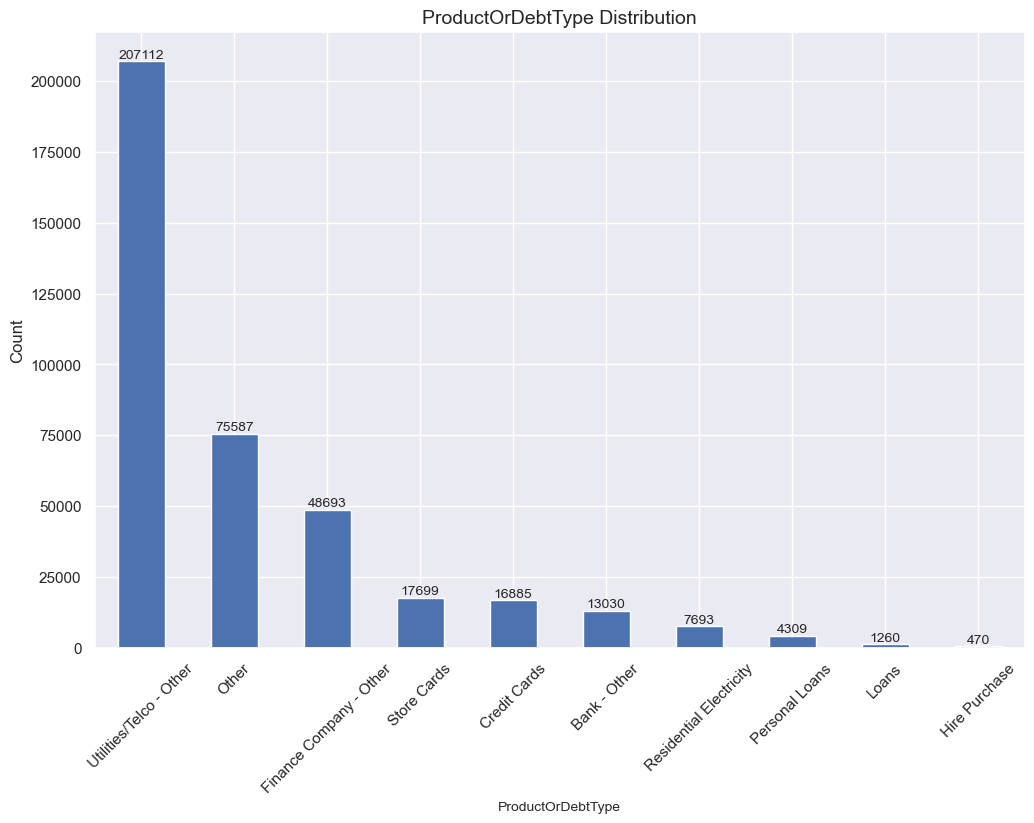

************************************************************************************************************************
CollectionStatus : 
ACTIVE                 167445
PASSIVE                128651
PAID_IN_FULL            67046
CLOSED                  13524
CANCELLED_WITHDRAWN      5401
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4191
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: CollectionStatus, dtype: int64


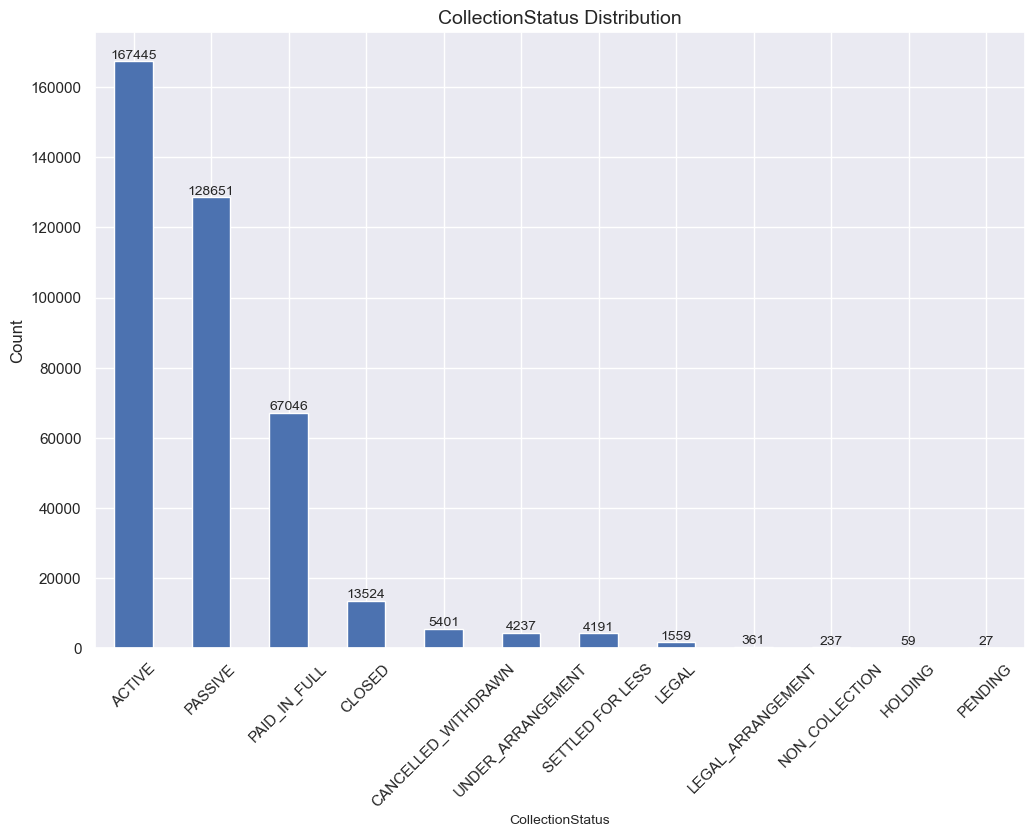

************************************************************************************************************************
AccountInsolvencyType : 
LIQUIDATION_NOP                                           161
BANKRUPTCY_NOTICE                                         102
BANKRUPTCY_CREDITOR_UNION_PETITION                         18
BANKRUPTCY_CREDITOR_UNION_PETITION | BANKRUPTCY_NOTICE      2
BANKRUPTCY_NOTICE | LIQUIDATION_NOP                         2
Name: AccountInsolvencyType, dtype: int64


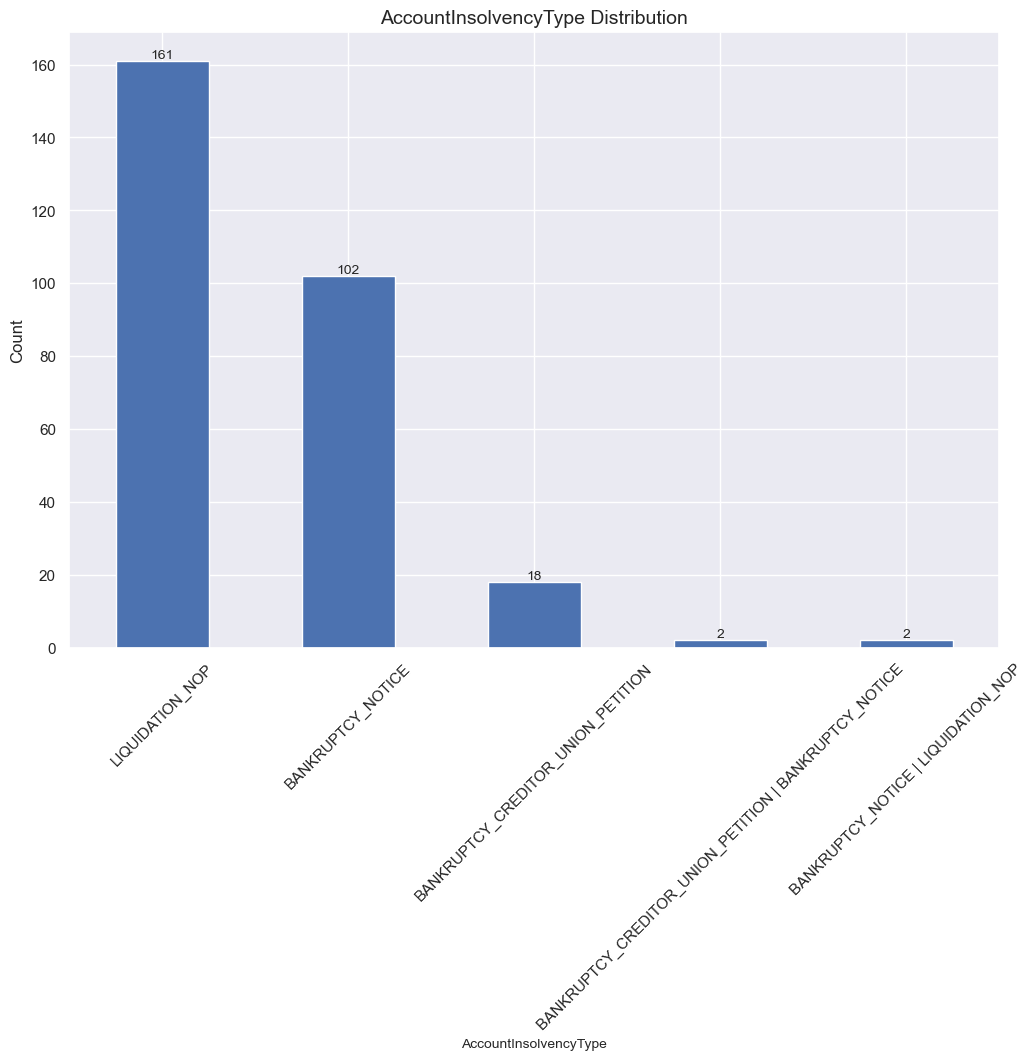

************************************************************************************************************************
CustomerInsolvencyType : 
BANKRUPT                                      3806
NO_ASSET_PROCEDURE                            3153
STRUCK_OFF                                    1009
LIQUIDATION                                    410
BANKRUPT | NO_ASSET_PROCEDURE                   59
APPLICATION_FOR_LIQUIDATION                     28
LIQUIDATION | STRUCK_OFF                        17
RECEIVERSHIP                                    15
BANKRUPT | LIQUIDATION                          13
LIQUIDATION | RECEIVERSHIP                       9
BANKRUPT | STRUCK_OFF                            5
APPLICATION_FOR_LIQUIDATION | STRUCK_OFF         2
APPLICATION_FOR_LIQUIDATION | RECEIVERSHIP       1
Name: CustomerInsolvencyType, dtype: int64


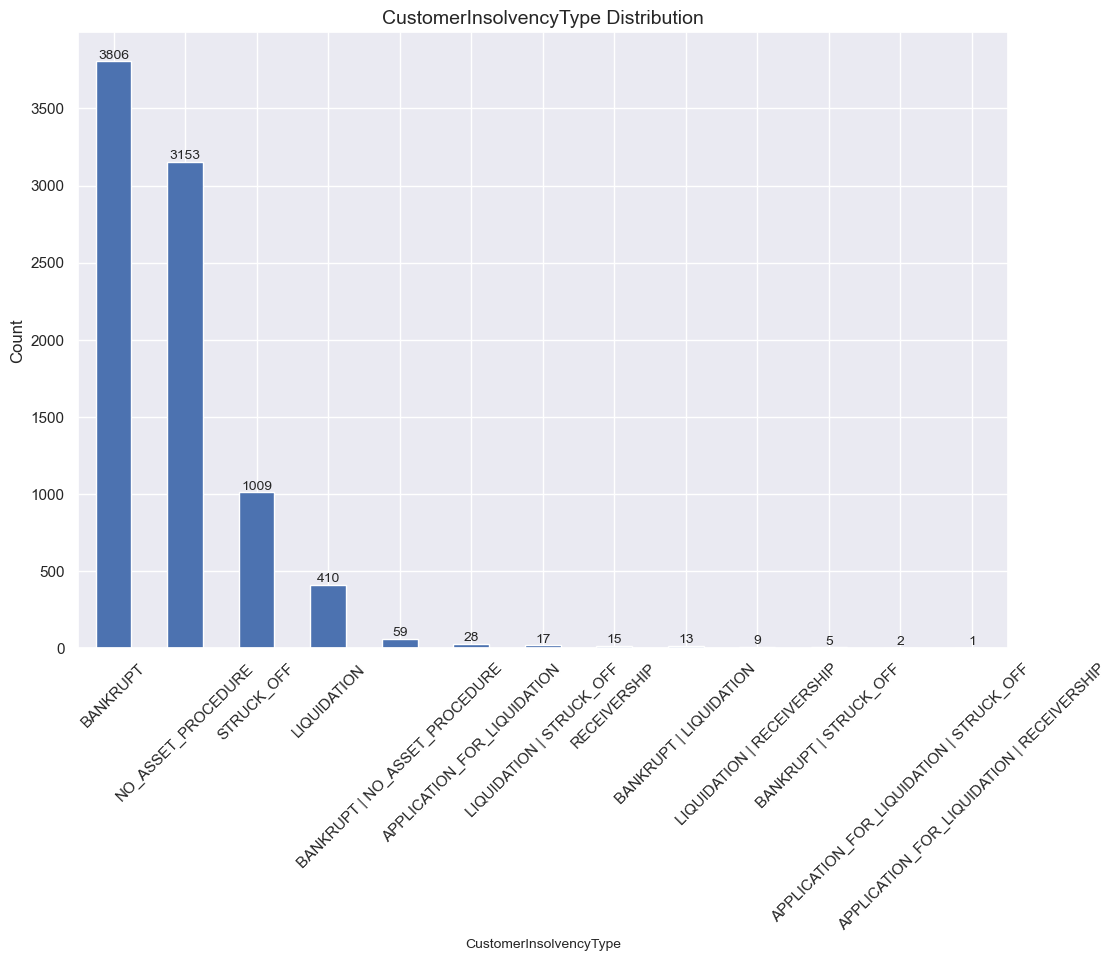

************************************************************************************************************************
LastPaymentMethod : 
Cheque                      52114
Automatic Payment           27338
Direct Credit                8798
Direct Debit                 5465
Unknown                      3702
Cash                         3359
Credit Card / Debit Card     1122
Direct Transfer                31
Mastercard                      7
Name: LastPaymentMethod, dtype: int64


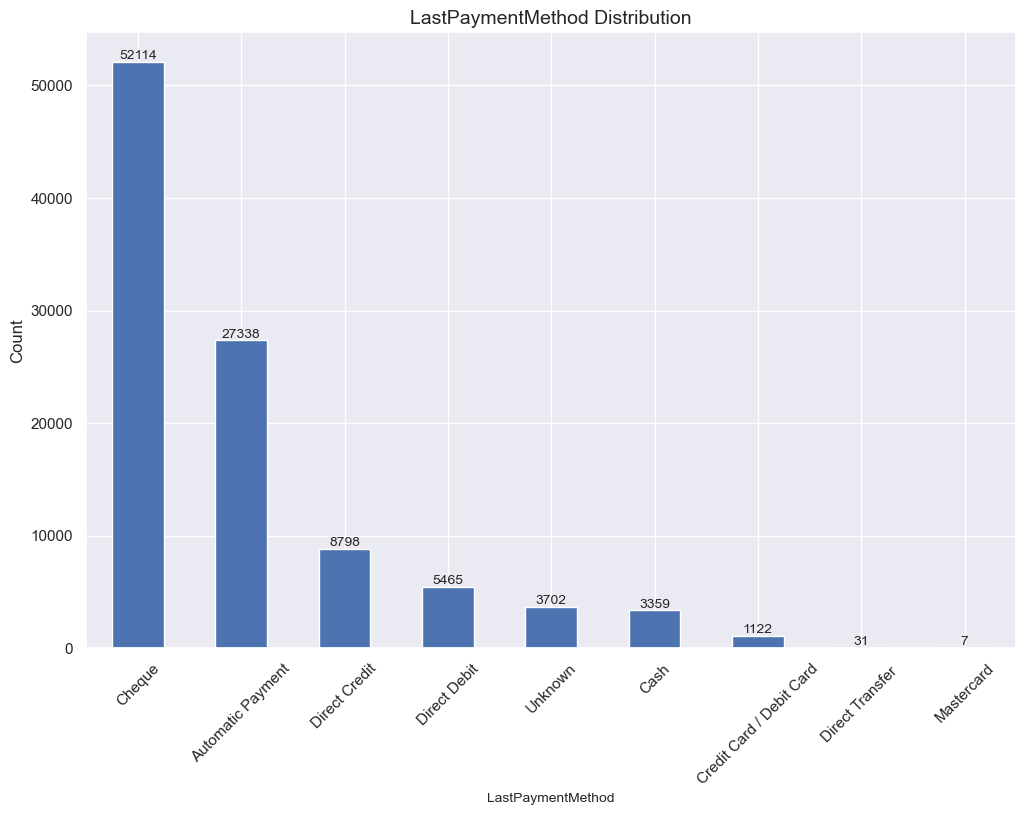

************************************************************************************************************************
ClosureReason : 
Insolvent                          5632
Statute Barred                     1777
Other Reason - Please see notes     650
Deceased                            405
Small Balance                       165
Duplicate Debt                      107
Uneconomical to pursue              105
Fraud                                96
Company Struck Off                   37
Client Instructions                  32
Sensitive Issue                      14
Paid                                  4
Incarcerated                          2
Disputes/Legal Case Lost              1
Name: ClosureReason, dtype: int64


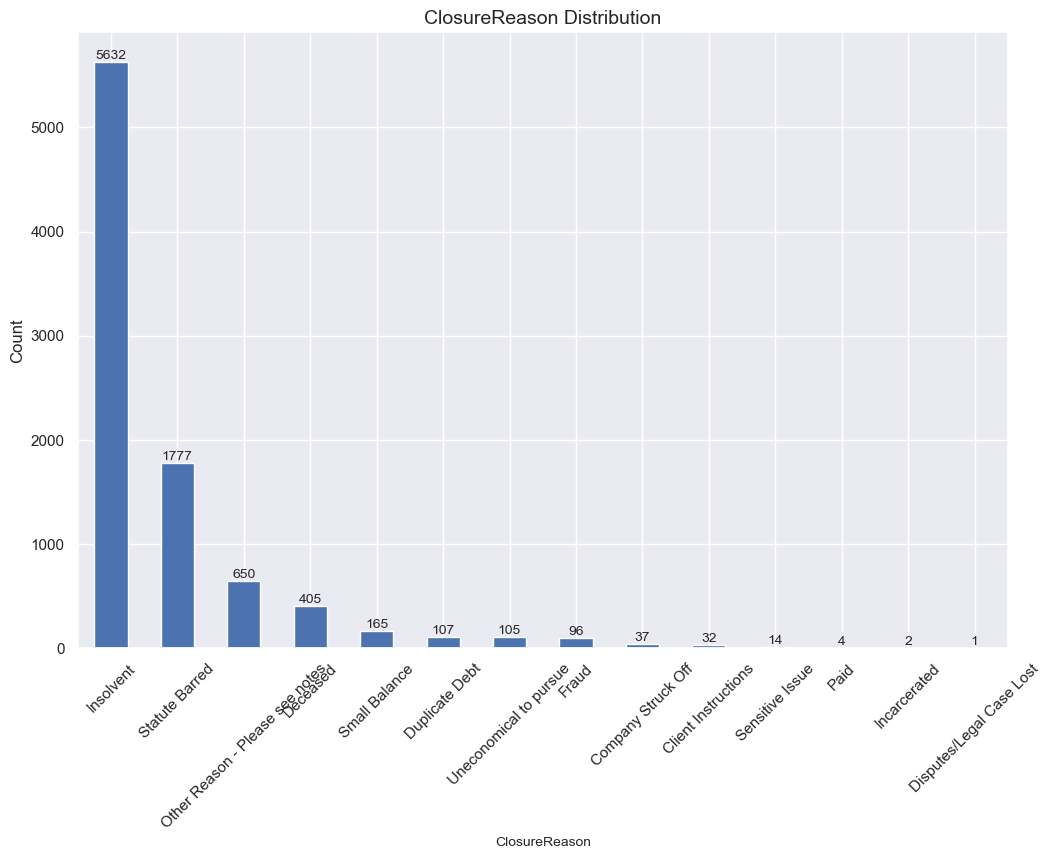

************************************************************************************************************************
NumLiableParties : 
1.0    385811
2.0      6650
3.0       151
4.0         4
Name: NumLiableParties, dtype: int64


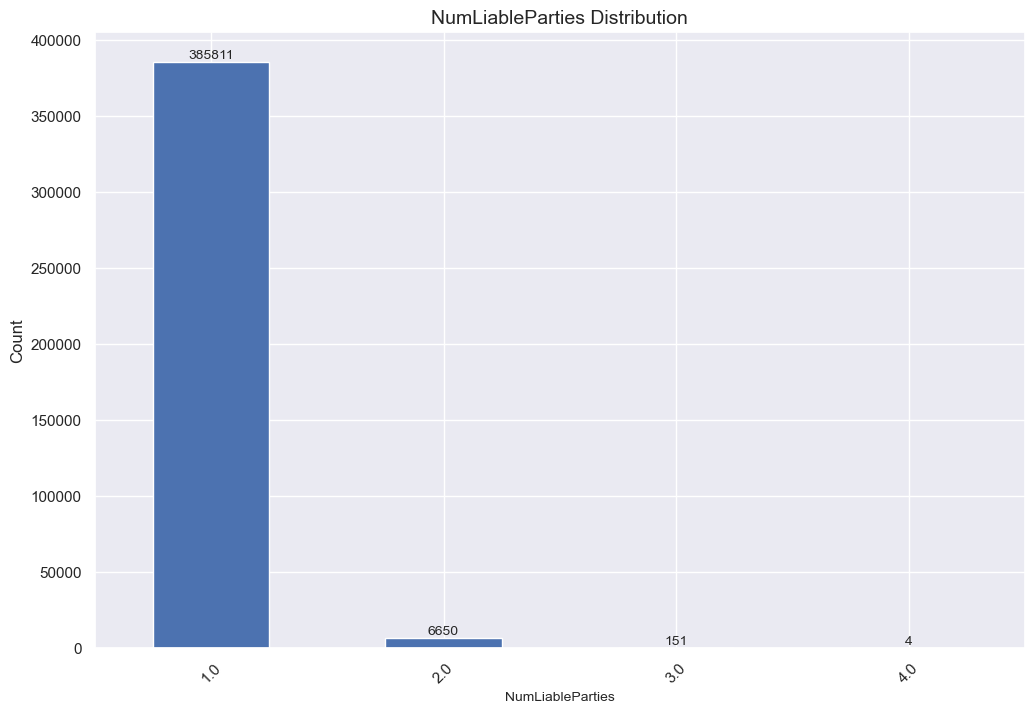

************************************************************************************************************************


In [15]:
categorical_columns = ['ProductOrDebtType', 'CollectionStatus', 'AccountInsolvencyType', 
                       'CustomerInsolvencyType', 'LastPaymentMethod', 'ClosureReason', 'NumLiableParties' ]
 
# Loop through the categorical columns and create bar plots
for column in categorical_columns:
    value_counts = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    ax = value_counts.plot(kind='bar')

    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{column} Distribution', fontsize=14)
    
    # Set the x-axis labels at a 45-degree angle
    plt.xticks(rotation=45)

    # Add labels to the bars
    for i, v in enumerate(value_counts):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
        
    print(f'{column} : \n{value_counts}')
    plt.show()
    print('*' * 120)

InBankruptcy : 
N    384589
Y      8149
Name: InBankruptcy, dtype: int64


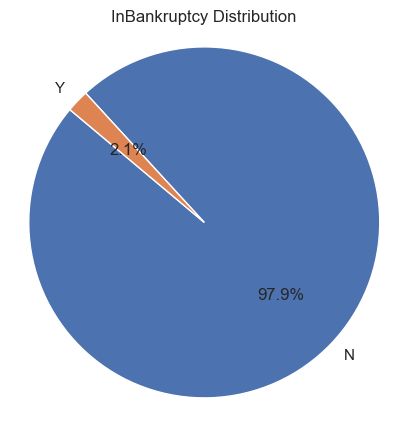

************************************************************************************************************************
IsLegal : 
N    383024
Y      9714
Name: IsLegal, dtype: int64


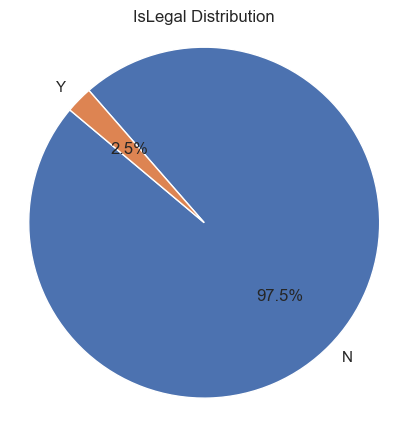

************************************************************************************************************************


In [16]:
Boolean_cols = ['InBankruptcy', 'IsLegal' ]

for column in Boolean_cols:
    category_counts = df[column].value_counts()
    labels = category_counts.index
    sizes = category_counts.values

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'{column} Distribution')
    
    print(f'{column} : \n{category_counts}')
    plt.show()
    print('*' * 120)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392738 entries, 0 to 406422
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   OriginalCreditor_Redacted  392738 non-null  object 
 1   CurrentBalance             392738 non-null  float64
 2   DebtLoadPrincipal          392738 non-null  float64
 3   BalanceAtDebtLoad          392738 non-null  float64
 4   PurchasePrice              390082 non-null  float64
 5   ProductOrDebtType          392738 non-null  object 
 6   CollectionStatus           392738 non-null  object 
 7   IsStatBarred               392738 non-null  object 
 8   ClosureReason              9027 non-null    object 
 9   InBankruptcy               392738 non-null  object 
 10  AccountInsolvencyType      285 non-null     object 
 11  CustomerInsolvencyType     8527 non-null    object 
 12  IsLegal                    392738 non-null  object 
 13  LastPaymentAmount          10

In [18]:
# import pandas as pd
# from pandas_profiling import ProfileReport

# # Create the ProfileReport object
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# # Generate the report
# profile.to_file("output_report.html")


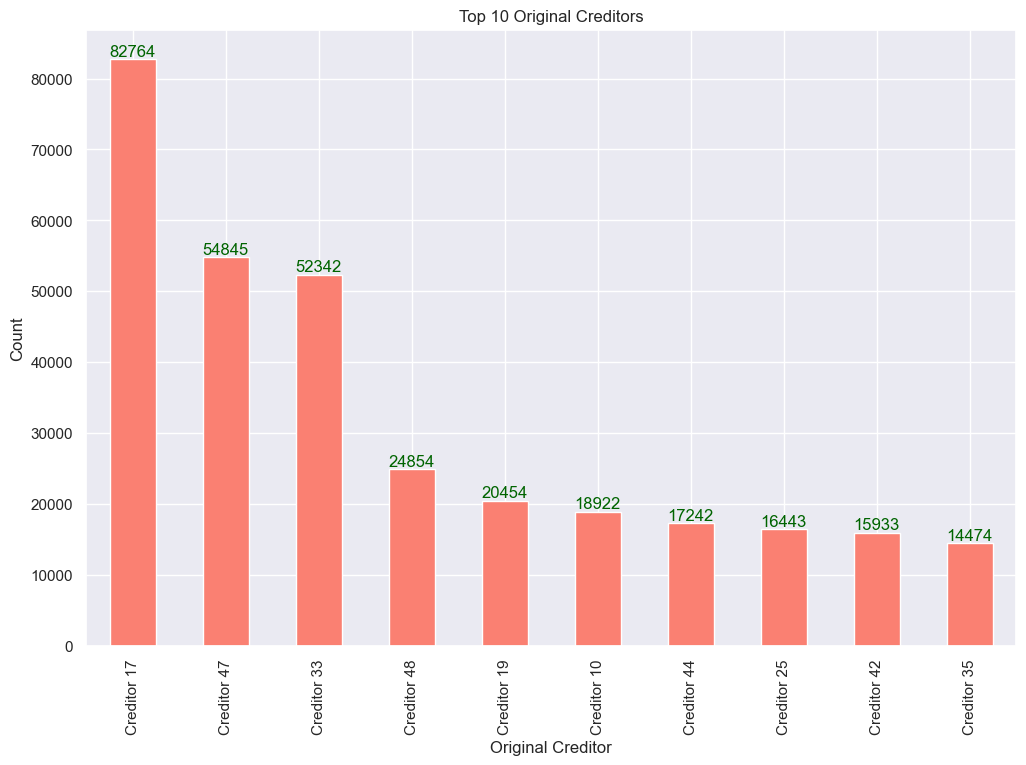

In [19]:
value_counts = df['OriginalCreditor_Redacted'].value_counts().head(10)

plt.figure(figsize=(12, 8))
ax = value_counts.plot(kind='bar', color='salmon')

for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', color='darkgreen')

plt.xlabel('Original Creditor')
plt.ylabel('Count')
plt.title('Top 10 Original Creditors')

plt.show()

In [20]:
OriginalCreditor_counts = df['OriginalCreditor_Redacted'].value_counts()

OriginalCreditor_frequency = {
    "Very High (>50000)": (OriginalCreditor_counts > 50000).sum(),
    "High (20000-49999)": ((OriginalCreditor_counts >= 20000) & (OriginalCreditor_counts <= 50000)).sum(),
    "Average (10000-19999)": ((OriginalCreditor_counts >= 10000) & (OriginalCreditor_counts < 20000)).sum(),
    "Low (1000-9999)": ((OriginalCreditor_counts > 1000) & (OriginalCreditor_counts < 10000)).sum(),
    "Very Low ": (OriginalCreditor_counts < 1000).sum()
}

OriginalCreditor_frequency

{'Very High (>50000)': 3,
 'High (20000-49999)': 2,
 'Average (10000-19999)': 7,
 'Low (1000-9999)': 13,
 'Very Low ': 27}

### Observations

- In the dataset, there are a total of 52 unique creditors.
- The distribution of the frequency of loan issuance is as follows:
    - A very high loan issuance frequency, with more than 50,000 loans given, is observed for 3 creditors.
    - A high loan issuance frequency, with 25 creditors giving between 20,000 and 50,000 loans.
    - An average loan issuance frequency, with 7 creditors giving between 10,000 and 20,000 loans.
    - 13 creditors have a lower loan issuance frequency, providing between 1,000 and 10,000 loans.
    - The majority of creditors, 27 in total, fall into the very low loan issuance category, giving less than 1,000 loans each.
    - Creditor 17 has issued the maximum number of loans, with a total of 82,764 loans given.

In [21]:
df.select_dtypes(include='number')

CurrentBalance  DebtLoadPrincipal  BalanceAtDebtLoad  PurchasePrice  \
0                 0.00            1160.20            1160.20           4.22   
1               182.90             182.90             182.90           4.22   
2                 0.00             538.57             538.57           4.22   
3              8279.50            8279.50            8279.50           4.22   
4                 0.00             523.00             523.00           4.22   
...                ...                ...                ...            ...   
406418          448.20             448.20             448.20           7.38   
406419         1678.37            1678.37            1678.37           7.38   
406420         3512.60            3512.60            3512.60           7.38   
406421         4477.31            4477.31            4477.31           7.38   
406422          272.59             272.59             272.59           7.38   

        LastPaymentAmount  NumLiableParties  CustomerAge  NumPhones  \
0                   10.00               1.0         53.0          0   
1                     NaN               1.0          NaN          0   
2                    5.37               1.0          NaN          1   
3                     NaN               1.0          NaN          1   
4                    5.00               1.0         46.0          2   
...                   ...               ...          ...        ...   
406418                NaN               1.0         36.0          1   
406419                NaN               1.0         37.0          0   
406420                NaN               1.0         71.0          1   
406421                NaN               1.0         38.0          1   
406422                NaN               1.0         30.0          0   

        NumEmails  NumAddresses  FrequencyEncodedCreditor  
0               0             1                  0.000020  
1               0             1                  0.000015  
2               0             1                  0.000020  
3               0             1                  0.000015  
4               0             1                  0.000020  
...           ...           ...                       ...  
406418          1             1                  0.033709  
406419          1             1                  0.033709  
406420          1             1                  0.033709  
406421          1             1                  0.033709  
406422          1             1                  0.033709  

[392738 rows x 11 columns]

In [22]:
df['CurrentBalance'].isnull().sum()

0

In [23]:
df['CurrentBalance'].describe()

count    392738.000000
mean       1342.940080
std        4093.774049
min       -7717.200000
25%         106.660000
50%         486.885000
75%        1204.755000
max      441681.520000
Name: CurrentBalance, dtype: float64

<AxesSubplot:xlabel='CurrentBalance', ylabel='Count'>

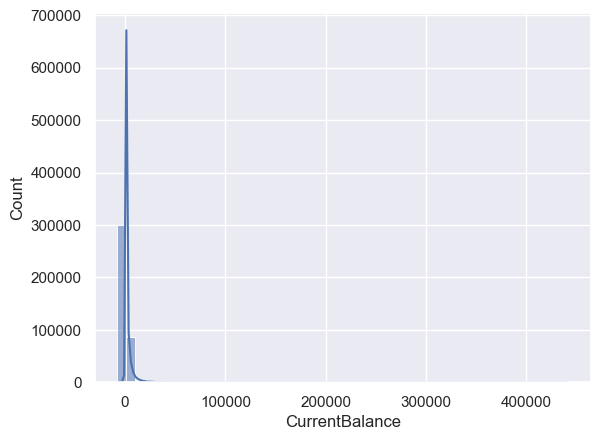

In [24]:
sns.histplot(df['CurrentBalance'], kde=True, bins=50)

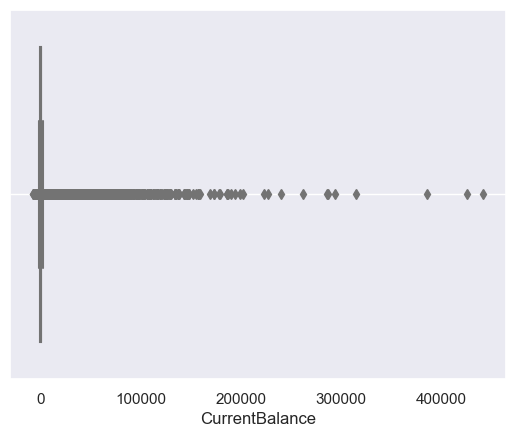

In [25]:
sns.boxplot(x=df['CurrentBalance'], color='lightgreen')
plt.grid()

Column: CurrentBalance
Descriptive Statistics:
count    392738.000000
mean       1342.940080
std        4093.774049
min       -7717.200000
25%         106.660000
50%         486.885000
75%        1204.755000
max      441681.520000
Name: CurrentBalance, dtype: float64
Visualizations:


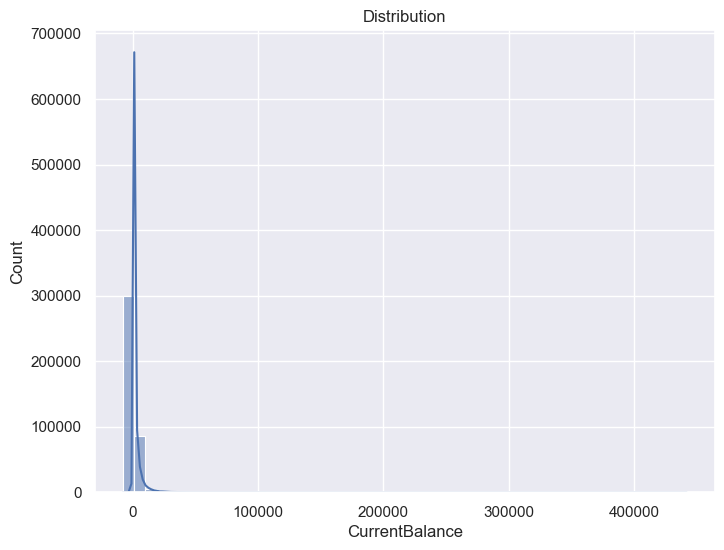

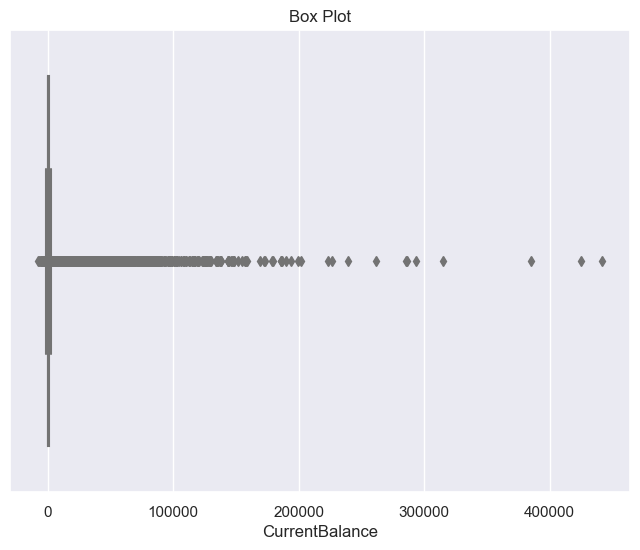

Missing Values: 0
Skewness: 26.6617532681843, Kurtosis: 1578.4880203617997

********************************************************************************

Column: DebtLoadPrincipal
Descriptive Statistics:
count    392738.000000
mean       1588.326619
std        4484.201899
min           0.000000
25%         272.852500
50%         647.840000
75%        1444.532500
max      844343.000000
Name: DebtLoadPrincipal, dtype: float64
Visualizations:


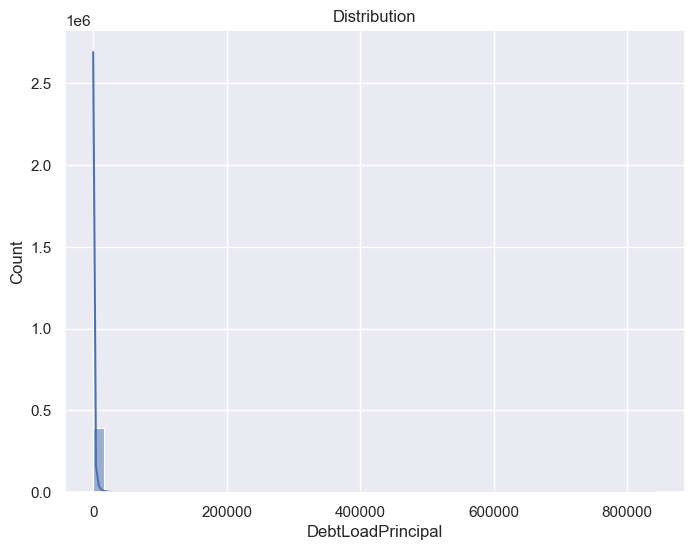

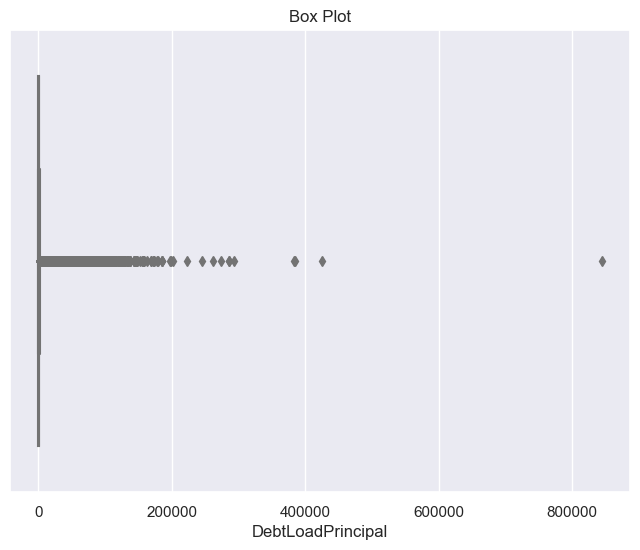

Missing Values: 0
Skewness: 37.04157608447361, Kurtosis: 4158.035766456796

********************************************************************************

Column: BalanceAtDebtLoad
Descriptive Statistics:
count    392738.000000
mean       1652.214304
std        4601.427751
min           0.000000
25%         276.212500
50%         661.015000
75%        1487.530000
max      844343.000000
Name: BalanceAtDebtLoad, dtype: float64
Visualizations:


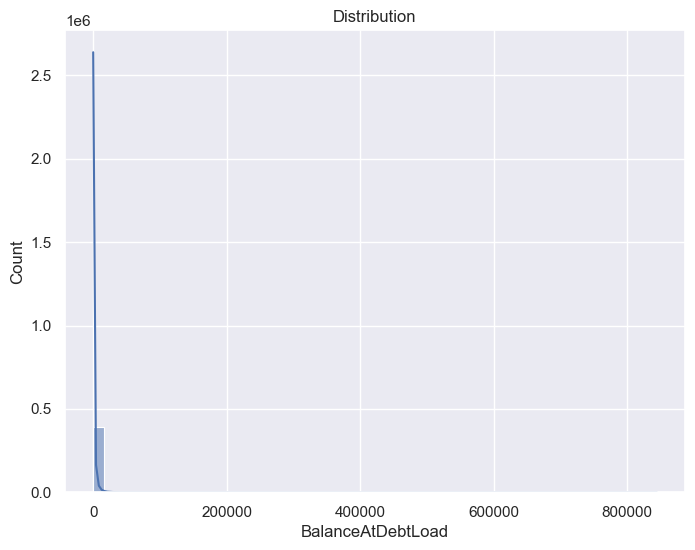

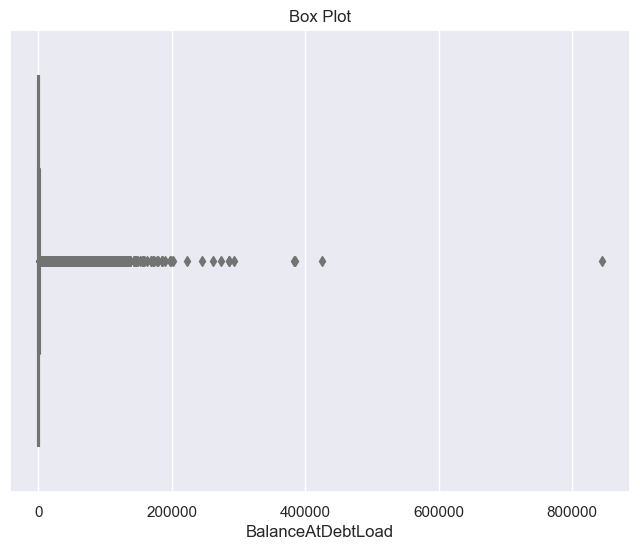

Missing Values: 0
Skewness: 34.73736221391938, Kurtosis: 3756.827969373716

********************************************************************************

Column: PurchasePrice
Descriptive Statistics:
count    390082.000000
mean          5.673799
std           5.523877
min           0.190000
25%           3.070000
50%           4.220000
75%           6.590000
max          52.180000
Name: PurchasePrice, dtype: float64
Visualizations:


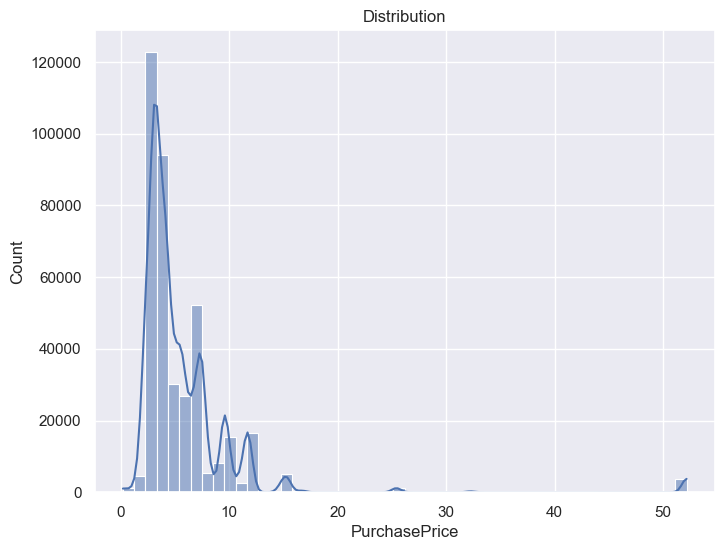

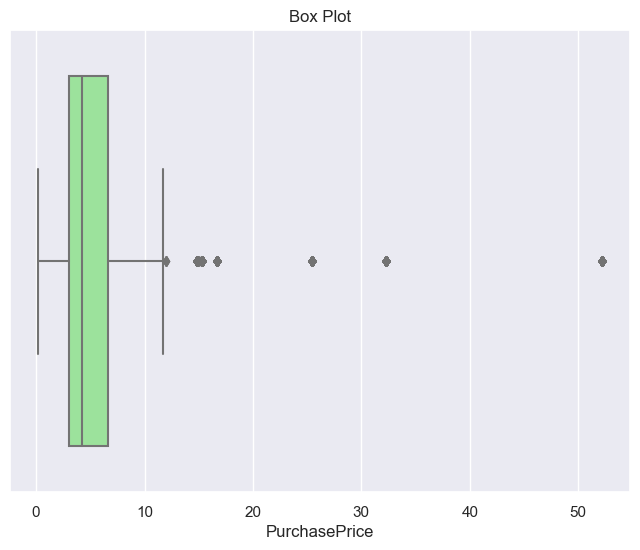

Missing Values: 2656
Skewness: 6.092353422138298, Kurtosis: 46.78109783333852

********************************************************************************

Column: LastPaymentAmount
Descriptive Statistics:
count    101936.000000
mean        288.864296
std        1130.437416
min           0.010000
25%          20.000000
50%          40.000000
75%         148.712500
max       73131.840000
Name: LastPaymentAmount, dtype: float64
Visualizations:


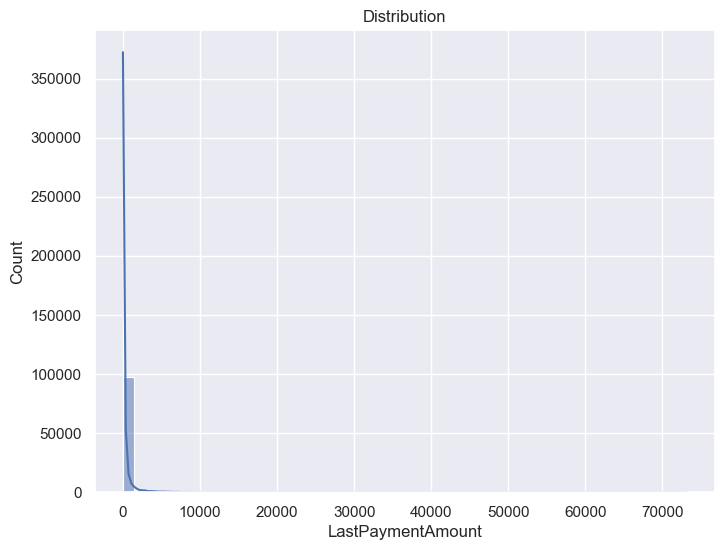

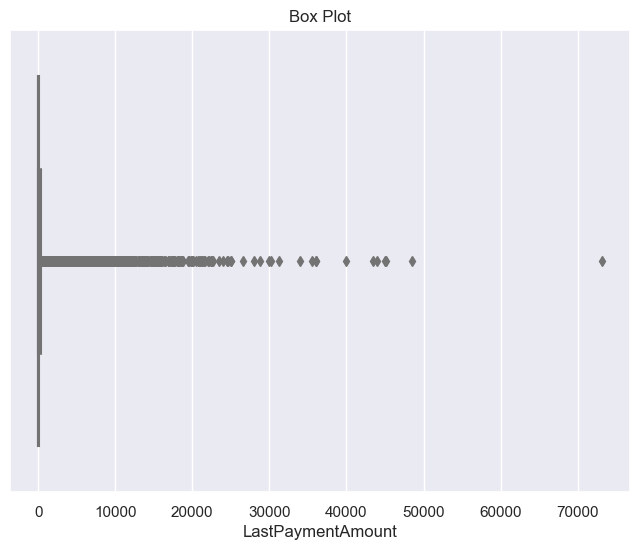

Missing Values: 290802
Skewness: 15.402301901231978, Kurtosis: 459.87104980745244

********************************************************************************

Column: NumLiableParties
Descriptive Statistics:
count    392616.000000
mean          1.017737
std           0.135104
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: NumLiableParties, dtype: float64
Visualizations:


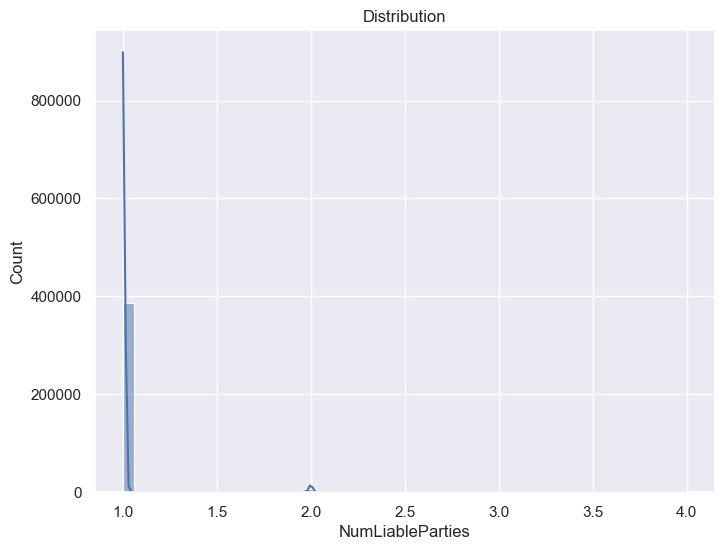

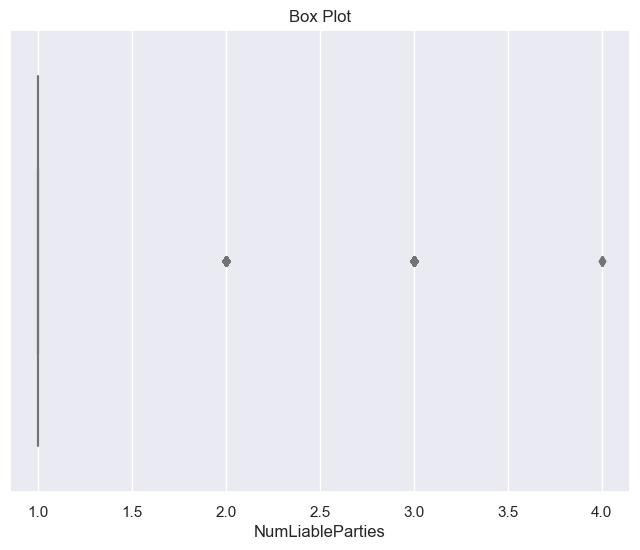

Missing Values: 122
Skewness: 7.83136576965974, Kurtosis: 64.56761252746503

********************************************************************************

Column: CustomerAge
Descriptive Statistics:
count    366247.000000
mean         45.938091
std          12.862099
min         -41.000000
25%          36.000000
50%          44.000000
75%          54.000000
max         133.000000
Name: CustomerAge, dtype: float64
Visualizations:


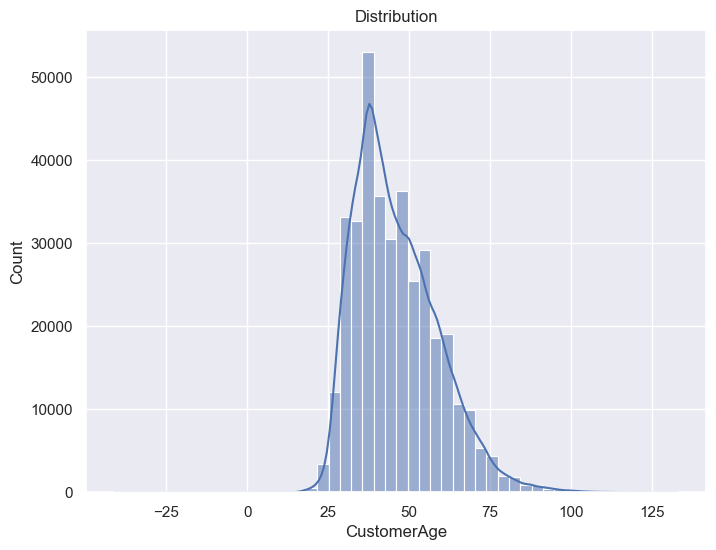

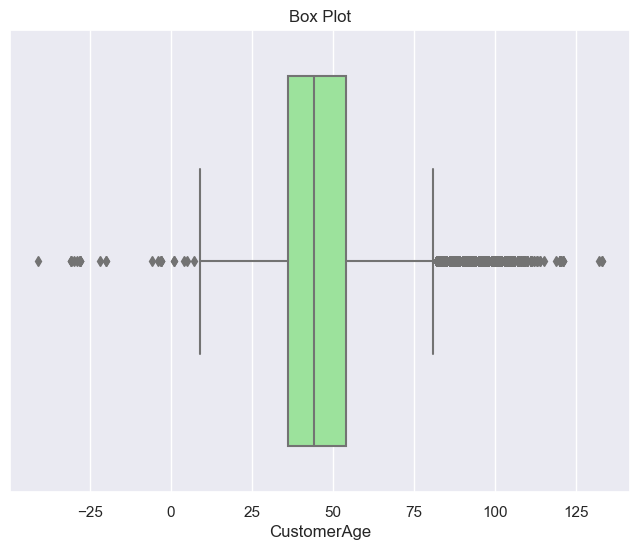

Missing Values: 26491
Skewness: 0.7827480261910369, Kurtosis: 0.6581572026626108

********************************************************************************

Column: NumPhones
Descriptive Statistics:
count    392738.000000
mean          0.433961
std           0.718578
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: NumPhones, dtype: float64
Visualizations:


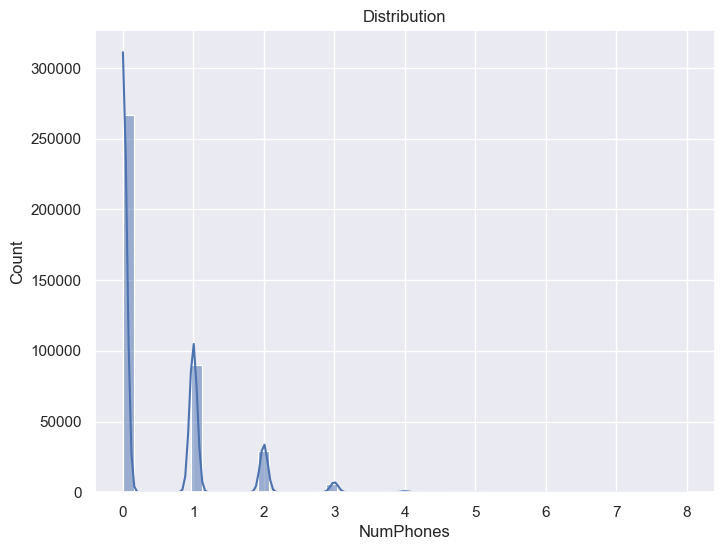

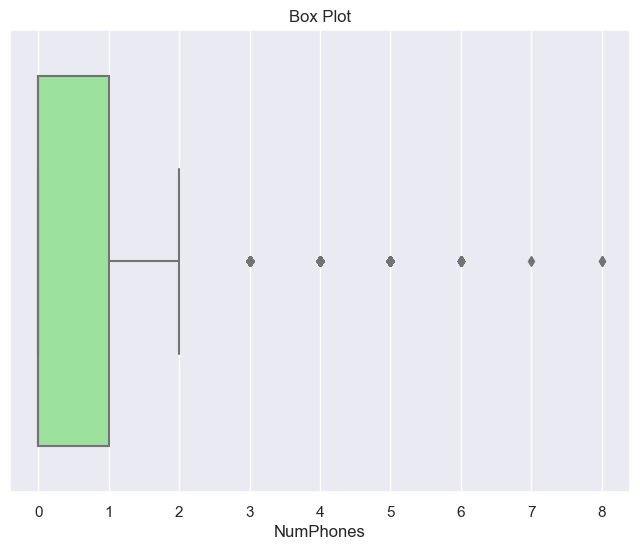

Missing Values: 0
Skewness: 1.7599764706879144, Kurtosis: 3.190077514646644

********************************************************************************

Column: NumEmails
Descriptive Statistics:
count    392738.000000
mean          0.215299
std           0.440010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: NumEmails, dtype: float64
Visualizations:


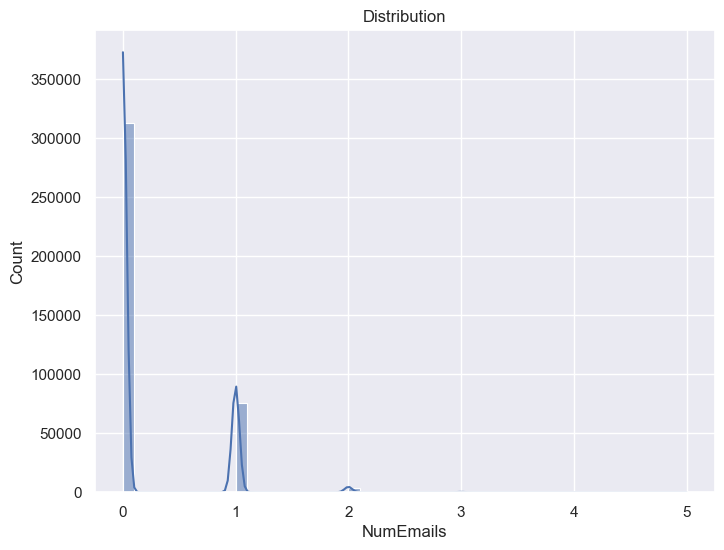

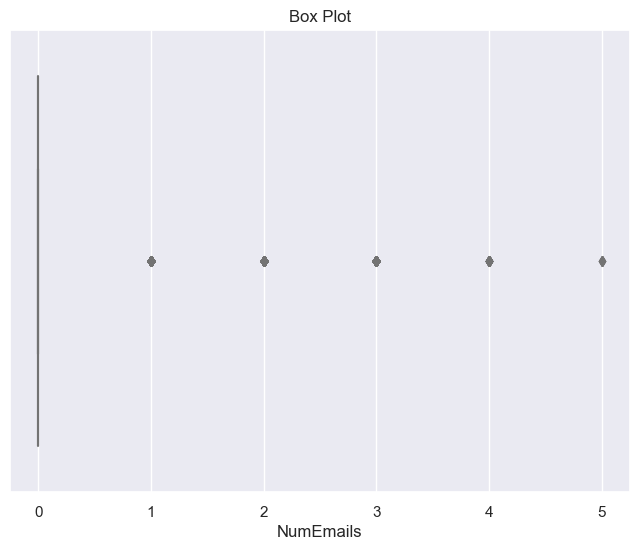

Missing Values: 0
Skewness: 1.8833884029388026, Kurtosis: 3.236459675535187

********************************************************************************

Column: NumAddresses
Descriptive Statistics:
count    392738.000000
mean          0.843919
std           0.465290
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: NumAddresses, dtype: float64
Visualizations:


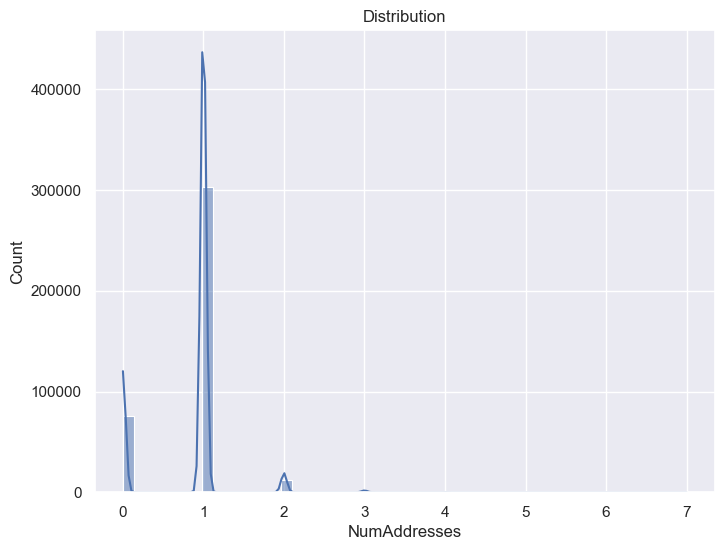

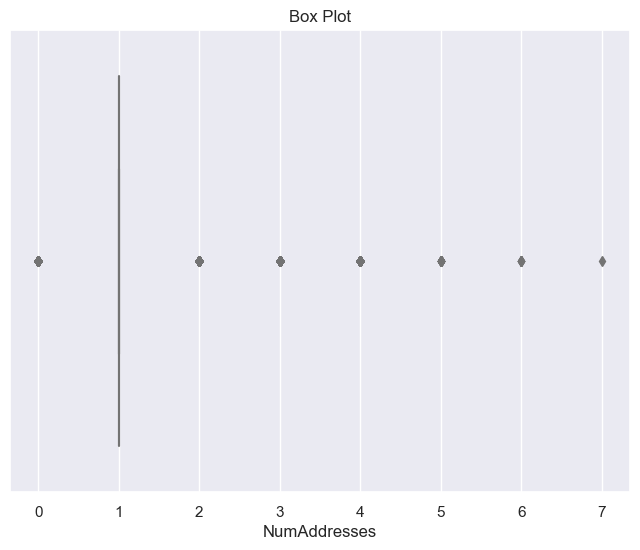

Missing Values: 0
Skewness: -0.19021392140482102, Kurtosis: 3.0576923217948284

********************************************************************************



In [26]:
# Get a list of numerical column names excluding 'FrequencyEncodedCreditor'
numerical_columns = [col for col in df.select_dtypes(include='number').columns if col != 'FrequencyEncodedCreditor']

for column in numerical_columns:
    print(f"Column: {column}")
    print("Descriptive Statistics:")
    print(df[column].describe())
    
    print("Visualizations:")
    
    # Histogram with KDE
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=50)
    plt.title("Distribution")
    plt.show()
    
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title("Box Plot")
    plt.show()
    
    # Missing Values
    missing_values = df[column].isnull().sum()
    print(f"Missing Values: {missing_values}")
    
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")
    
    print("\n" + "*" * 80 + "\n")

In [27]:
for column in numerical_columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    print(f"Column: {column}")
    print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Column: CurrentBalance
Skewness: 26.6617532681843, Kurtosis: 1578.4880203617997
Column: DebtLoadPrincipal
Skewness: 37.04157608447361, Kurtosis: 4158.035766456796
Column: BalanceAtDebtLoad
Skewness: 34.73736221391938, Kurtosis: 3756.827969373716
Column: PurchasePrice
Skewness: 6.092353422138298, Kurtosis: 46.78109783333852
Column: LastPaymentAmount
Skewness: 15.402301901231978, Kurtosis: 459.87104980745244
Column: NumLiableParties
Skewness: 7.83136576965974, Kurtosis: 64.56761252746503
Column: CustomerAge
Skewness: 0.7827480261910369, Kurtosis: 0.6581572026626108
Column: NumPhones
Skewness: 1.7599764706879144, Kurtosis: 3.190077514646644
Column: NumEmails
Skewness: 1.8833884029388026, Kurtosis: 3.236459675535187
Column: NumAddresses
Skewness: -0.19021392140482102, Kurtosis: 3.0576923217948284


Visualizations:


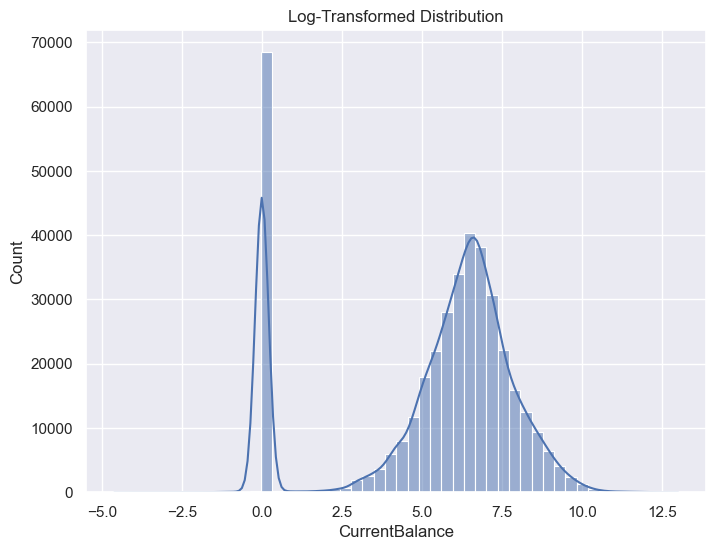

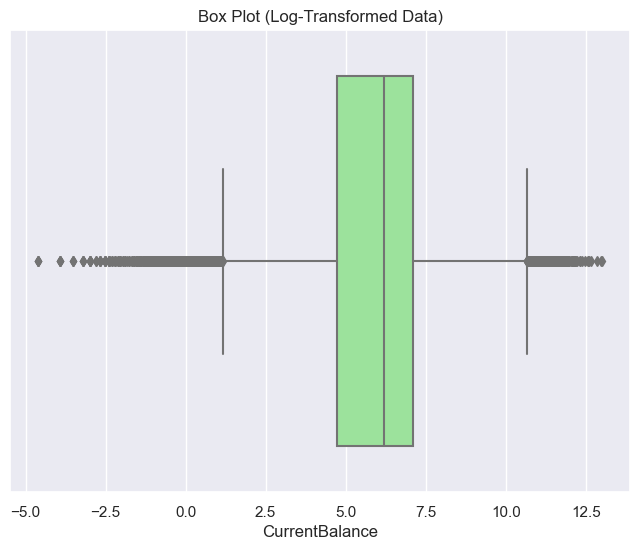

Skewness (after transformation): nan, Kurtosis (after transformation): nan

********************************************************************************

Visualizations:


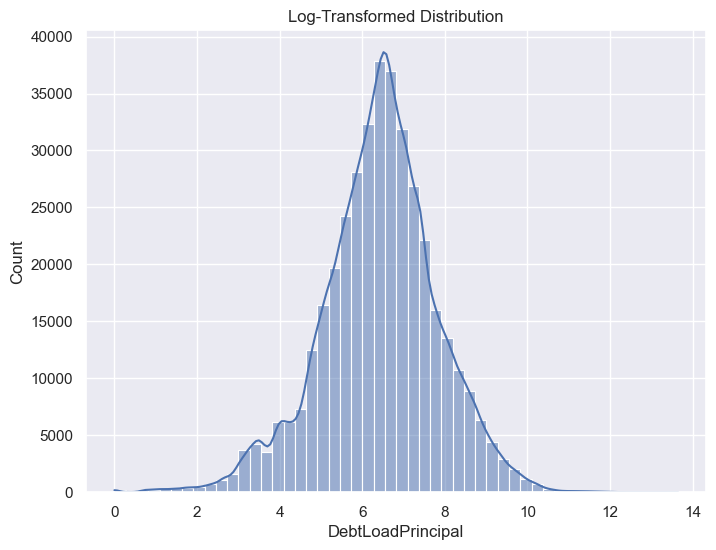

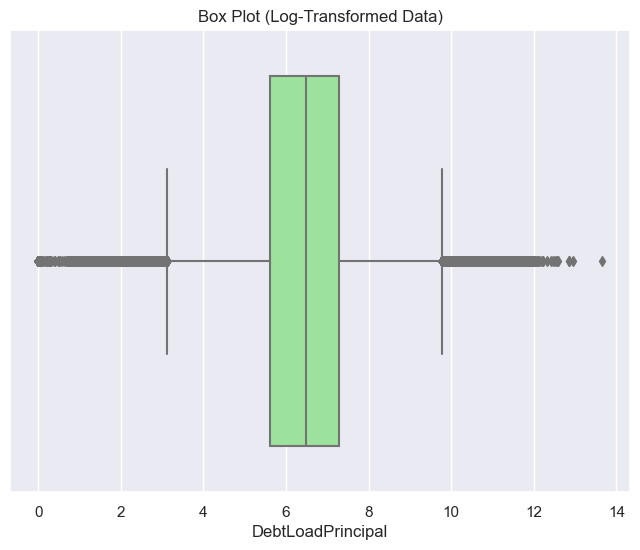

Skewness (after transformation): -0.2880407878197997, Kurtosis (after transformation): 0.847145615683274

********************************************************************************

Visualizations:


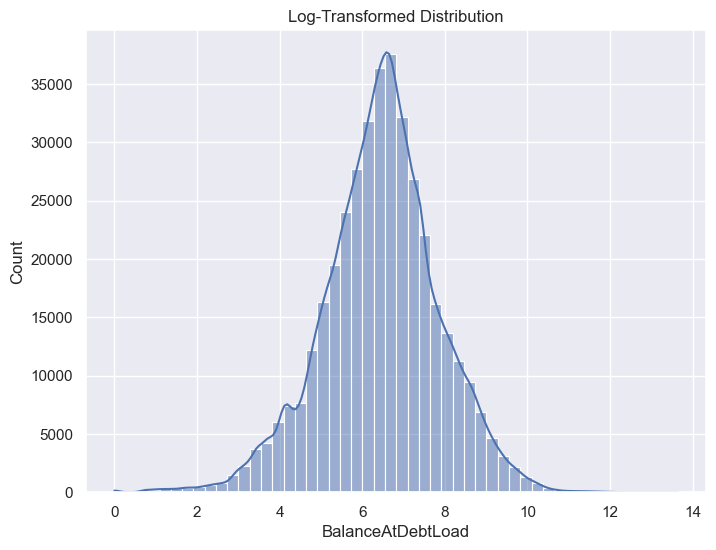

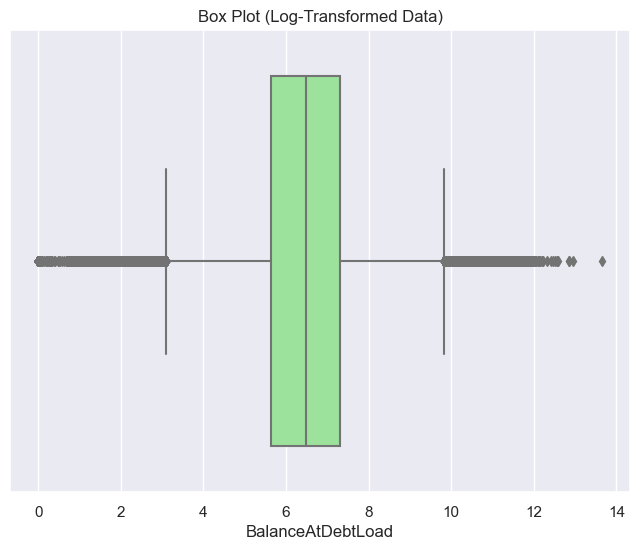

Skewness (after transformation): -0.2349115883764489, Kurtosis (after transformation): 0.7762771424724484

********************************************************************************

Visualizations:


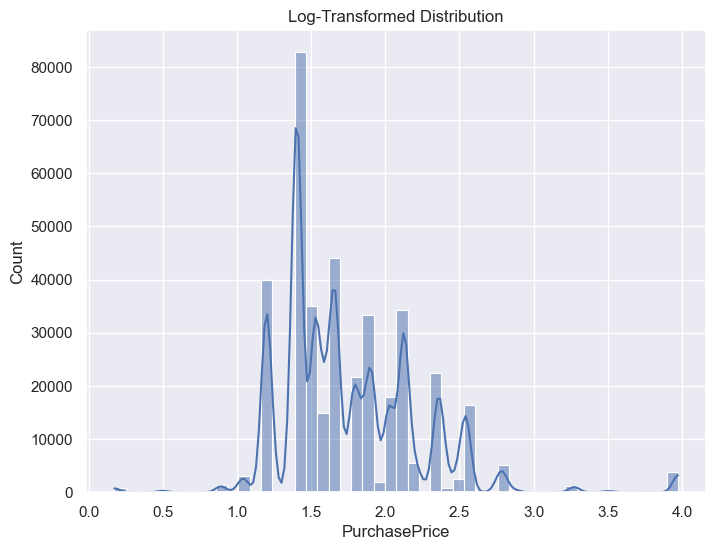

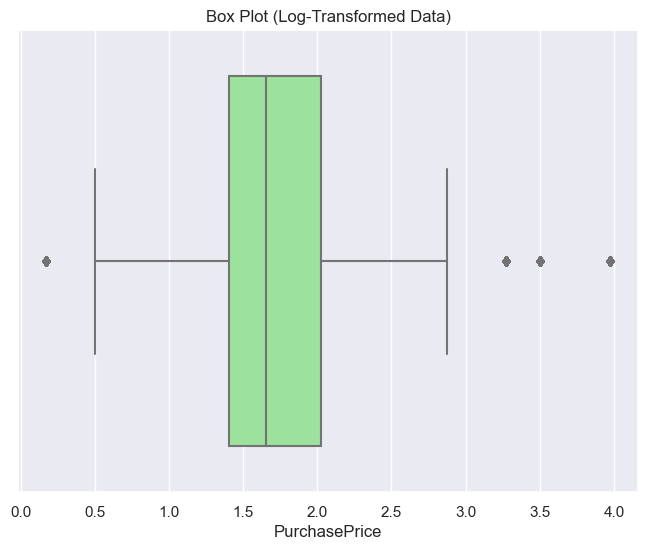

Skewness (after transformation): nan, Kurtosis (after transformation): nan

********************************************************************************

Visualizations:


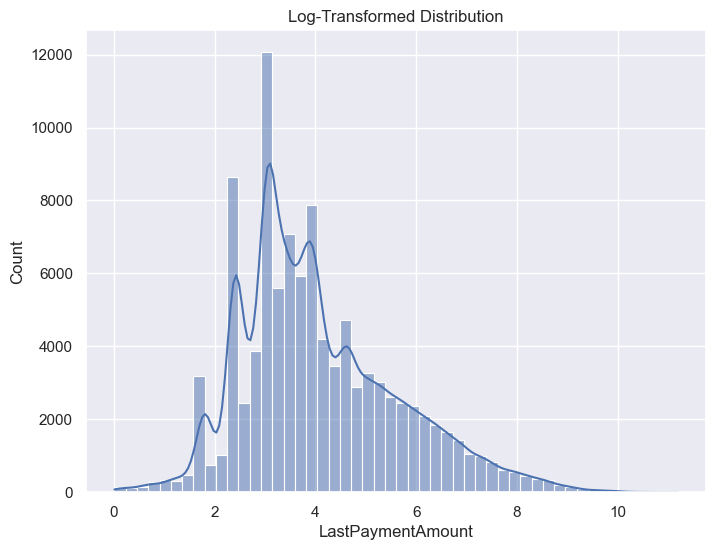

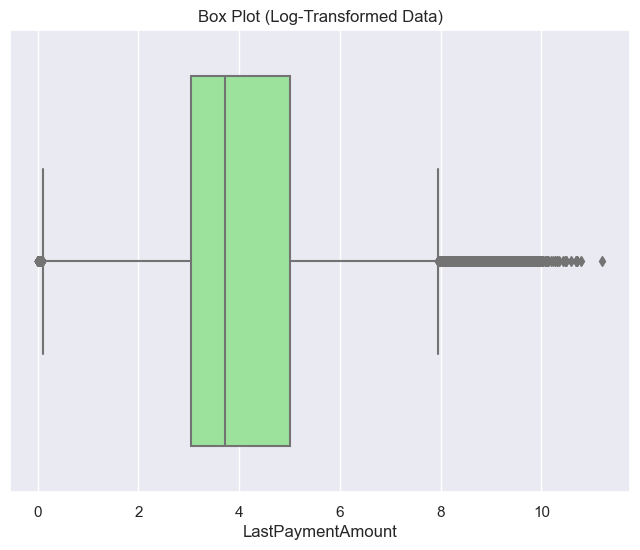

Skewness (after transformation): nan, Kurtosis (after transformation): nan

********************************************************************************

Visualizations:


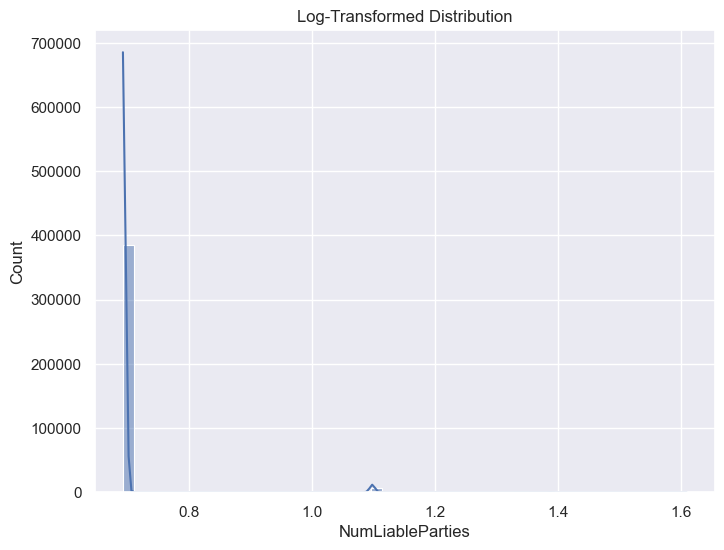

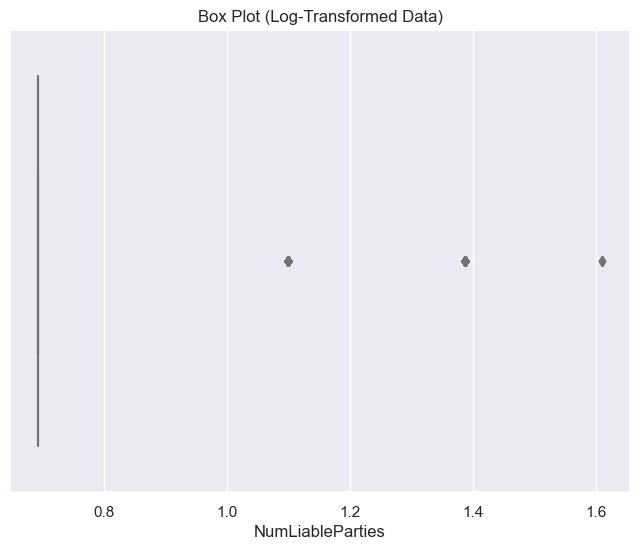

Skewness (after transformation): nan, Kurtosis (after transformation): nan

********************************************************************************

Visualizations:


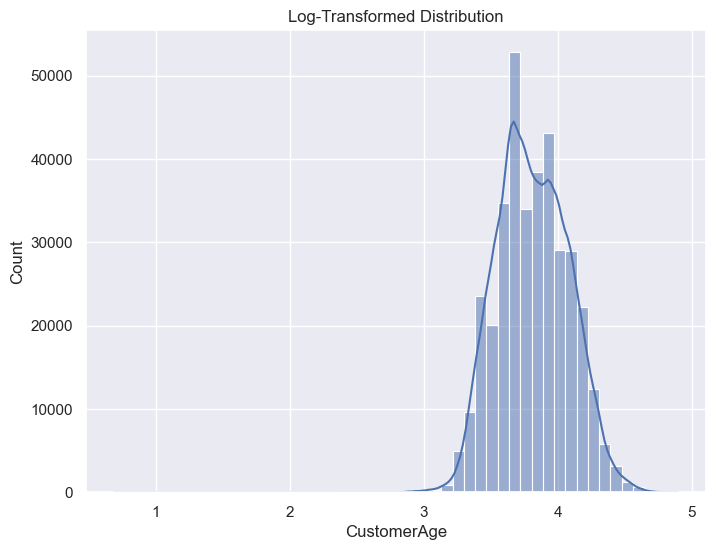

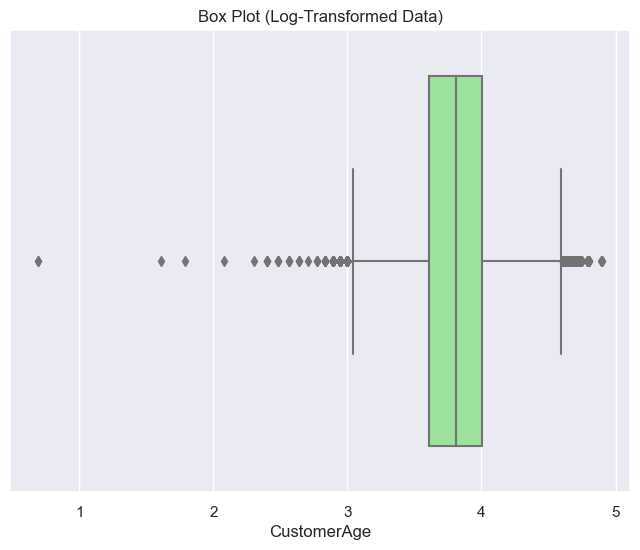

Skewness (after transformation): nan, Kurtosis (after transformation): nan

********************************************************************************

Visualizations:


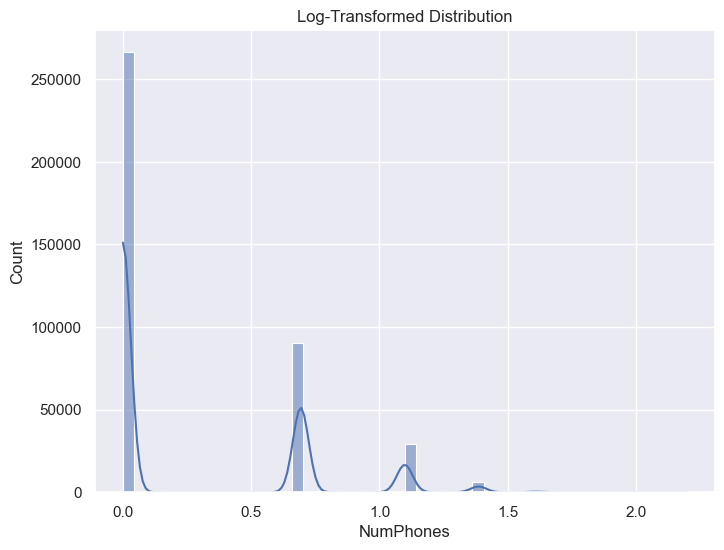

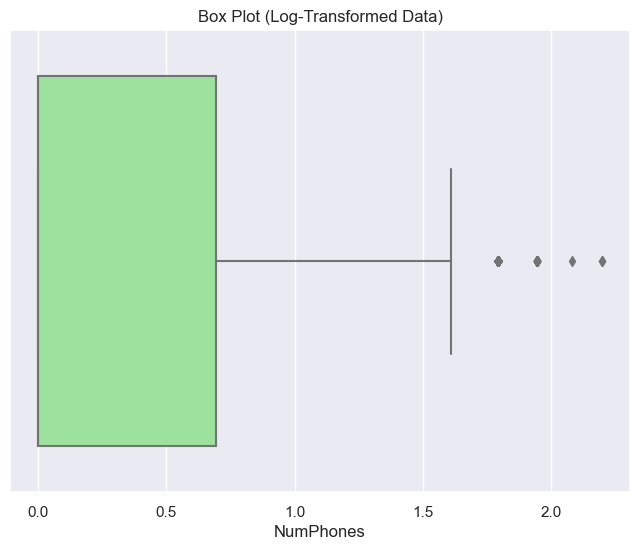

Skewness (after transformation): 1.1265621654569842, Kurtosis (after transformation): -0.09732741615432294

********************************************************************************

Visualizations:


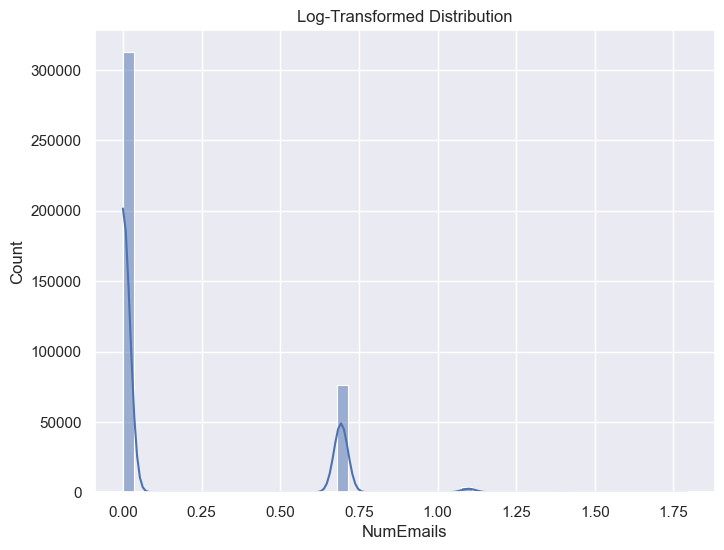

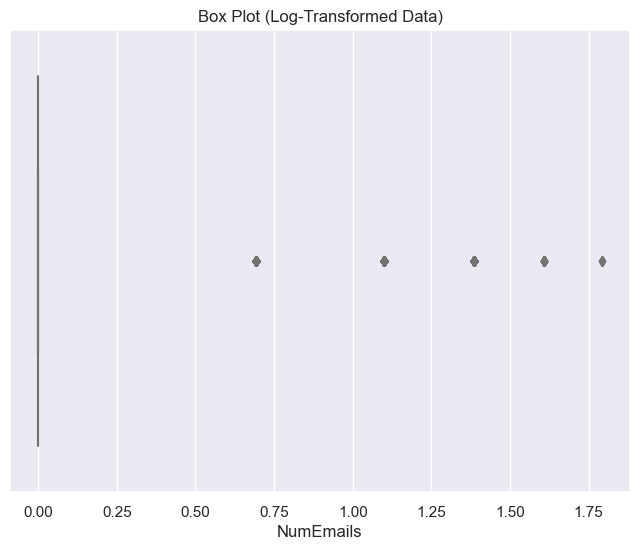

Skewness (after transformation): 1.584959239627982, Kurtosis (after transformation): 0.8460476085608613

********************************************************************************

Visualizations:


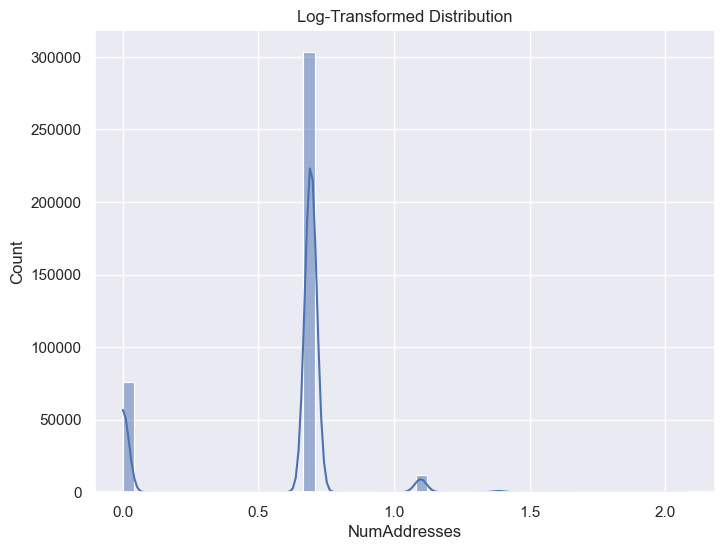

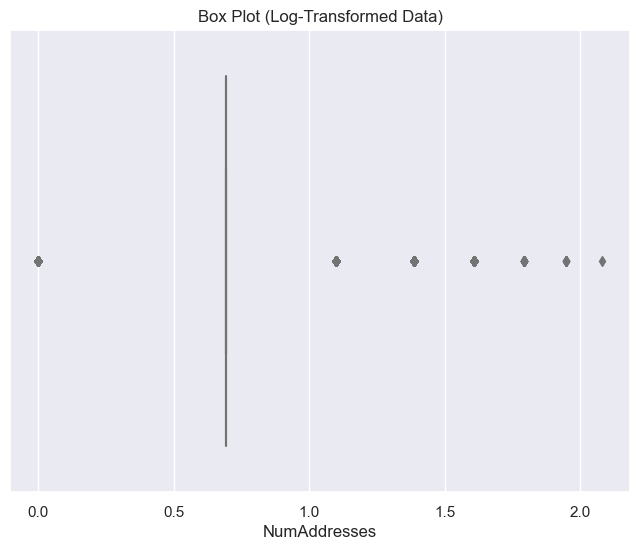

Skewness (after transformation): -1.1447817951203796, Kurtosis (after transformation): 0.44863992222762317

********************************************************************************



In [28]:
for column in numerical_columns:
    
    print("Visualizations:")
    
    # Log Transformation
    log_transformed_data = np.log1p(df[column])  # Applying log transformation
    plt.figure(figsize=(8, 6))
    
    # Histogram with KDE for log-transformed data
    sns.histplot(log_transformed_data, kde=True, bins=50)
    plt.title("Log-Transformed Distribution")
    plt.show()
    
    # Box plot for log-transformed data
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=log_transformed_data, color='lightgreen')
    plt.title("Box Plot (Log-Transformed Data)")
    plt.show()
    
    skewness = stats.skew(log_transformed_data)
    kurtosis = stats.kurtosis(log_transformed_data)
    print(f"Skewness (after transformation): {skewness}, Kurtosis (after transformation): {kurtosis}")
    
    print("\n" + "*" * 80 + "\n")

Column: ProductOrDebtType
Value Counts:
Utilities/Telco - Other    207112
Other                       75587
Finance Company - Other     48693
Store Cards                 17699
Credit Cards                16885
Bank - Other                13030
Residential Electricity      7693
Personal Loans               4309
Loans                        1260
Hire Purchase                 470
Name: ProductOrDebtType, dtype: int64
Visualizations:


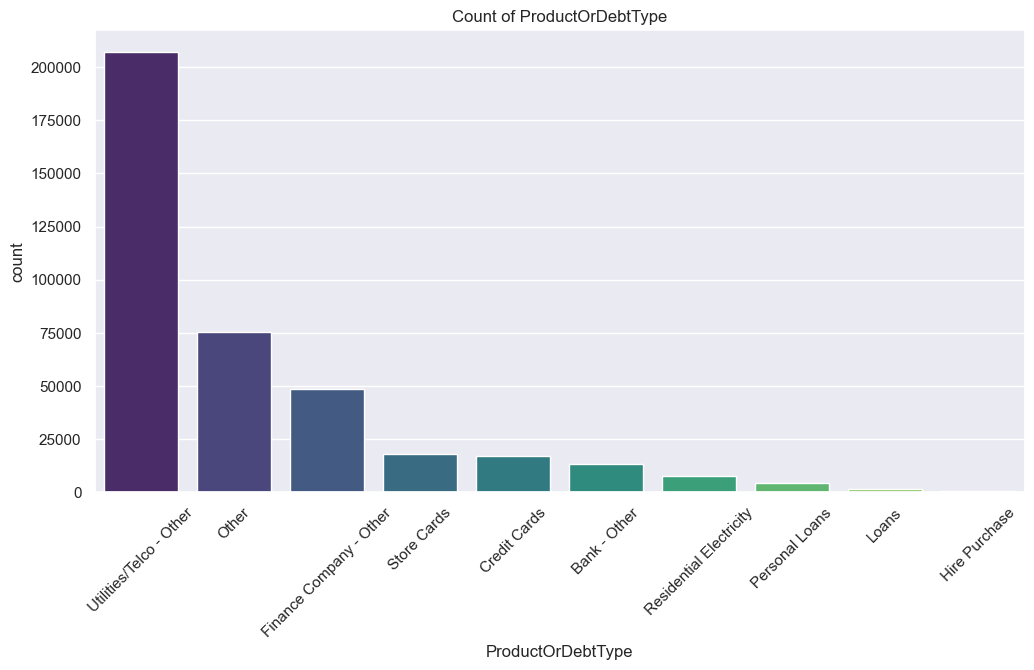


************************************************************************************************************************

Column: CollectionStatus
Value Counts:
ACTIVE                 167445
PASSIVE                128651
PAID_IN_FULL            67046
CLOSED                  13524
CANCELLED_WITHDRAWN      5401
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4191
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: CollectionStatus, dtype: int64
Visualizations:


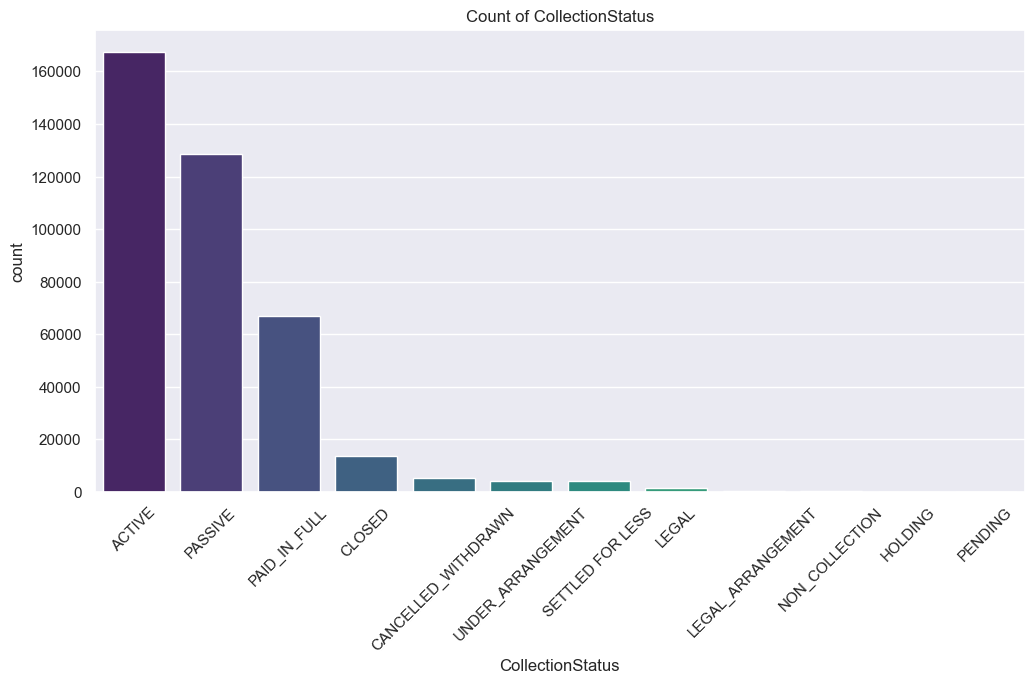


************************************************************************************************************************

Column: IsStatBarred
Value Counts:
Y    273082
N    119656
Name: IsStatBarred, dtype: int64
Visualizations:


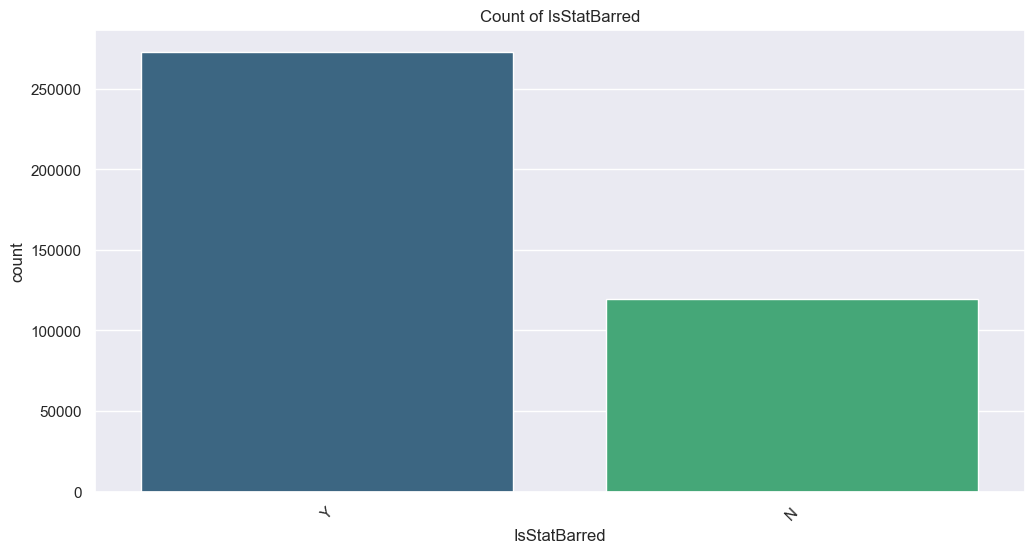


************************************************************************************************************************

Column: ClosureReason
Value Counts:
Insolvent                          5632
Statute Barred                     1777
Other Reason - Please see notes     650
Deceased                            405
Small Balance                       165
Duplicate Debt                      107
Uneconomical to pursue              105
Fraud                                96
Company Struck Off                   37
Client Instructions                  32
Sensitive Issue                      14
Paid                                  4
Incarcerated                          2
Disputes/Legal Case Lost              1
Name: ClosureReason, dtype: int64
Visualizations:


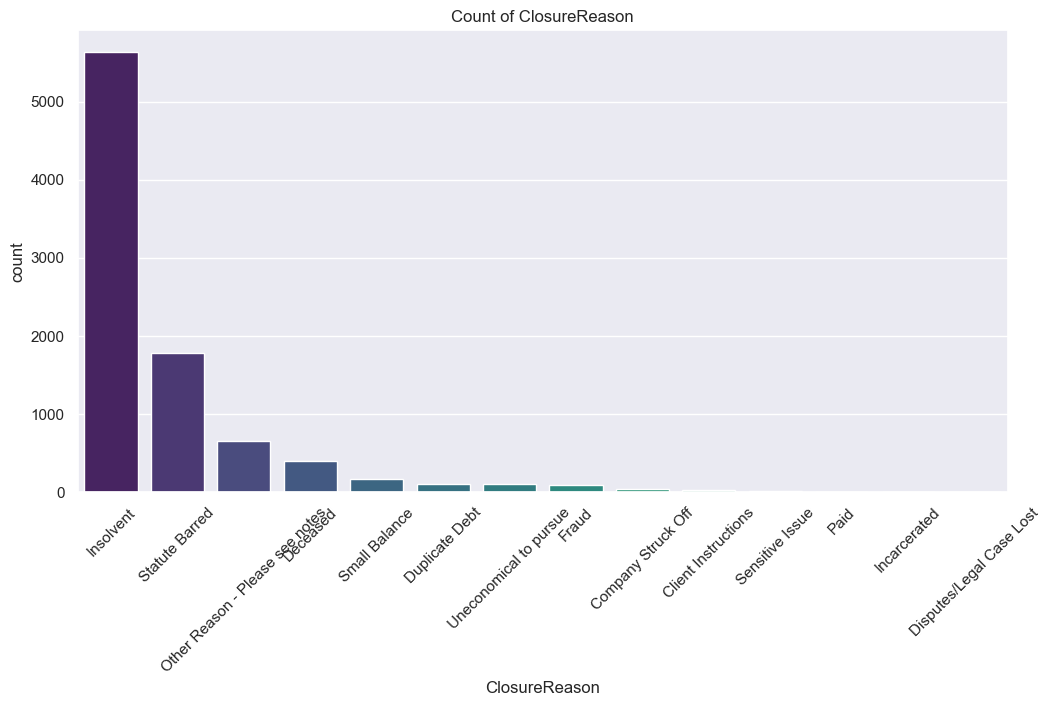


************************************************************************************************************************

Column: InBankruptcy
Value Counts:
N    384589
Y      8149
Name: InBankruptcy, dtype: int64
Visualizations:


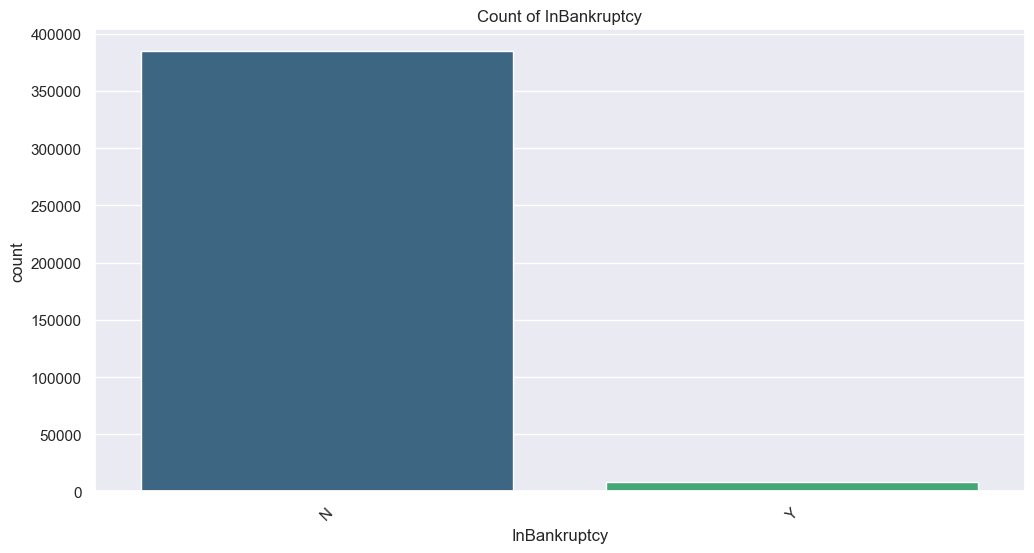


************************************************************************************************************************

Column: AccountInsolvencyType
Value Counts:
LIQUIDATION_NOP                                           161
BANKRUPTCY_NOTICE                                         102
BANKRUPTCY_CREDITOR_UNION_PETITION                         18
BANKRUPTCY_CREDITOR_UNION_PETITION | BANKRUPTCY_NOTICE      2
BANKRUPTCY_NOTICE | LIQUIDATION_NOP                         2
Name: AccountInsolvencyType, dtype: int64
Visualizations:


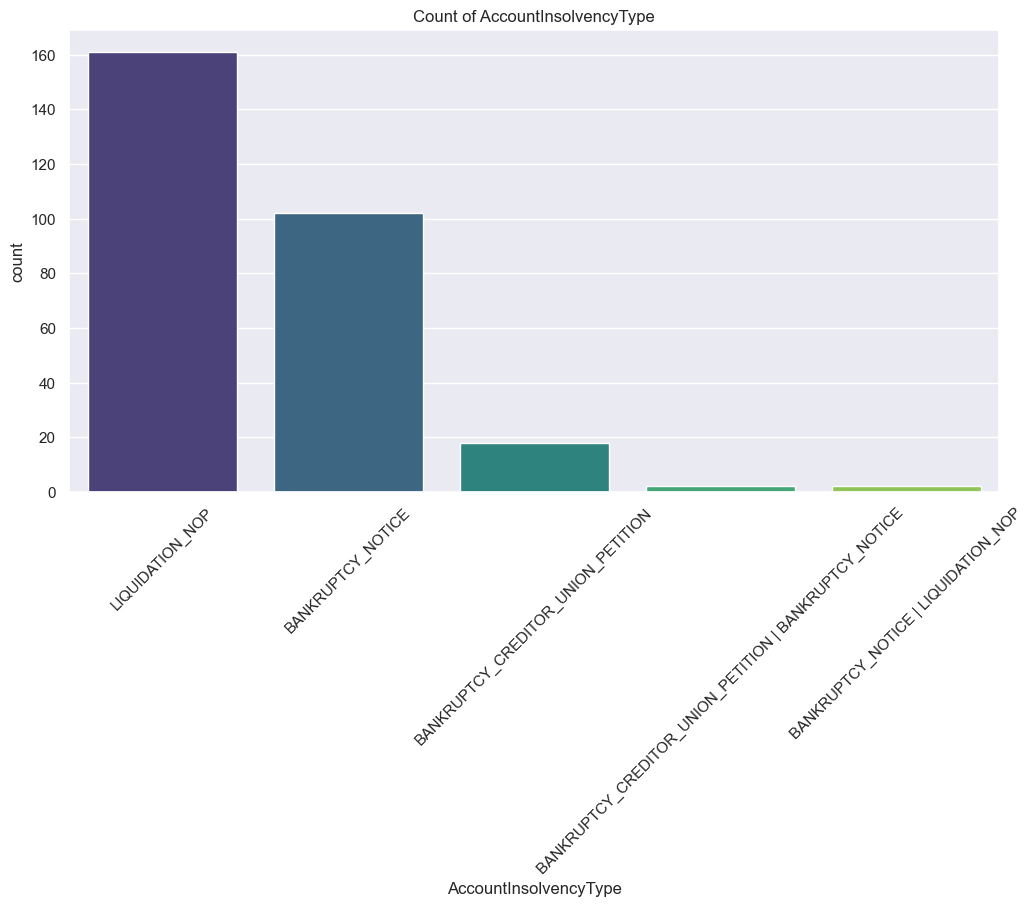


************************************************************************************************************************

Column: CustomerInsolvencyType
Value Counts:
BANKRUPT                                      3806
NO_ASSET_PROCEDURE                            3153
STRUCK_OFF                                    1009
LIQUIDATION                                    410
BANKRUPT | NO_ASSET_PROCEDURE                   59
APPLICATION_FOR_LIQUIDATION                     28
LIQUIDATION | STRUCK_OFF                        17
RECEIVERSHIP                                    15
BANKRUPT | LIQUIDATION                          13
LIQUIDATION | RECEIVERSHIP                       9
BANKRUPT | STRUCK_OFF                            5
APPLICATION_FOR_LIQUIDATION | STRUCK_OFF         2
APPLICATION_FOR_LIQUIDATION | RECEIVERSHIP       1
Name: CustomerInsolvencyType, dtype: int64
Visualizations:


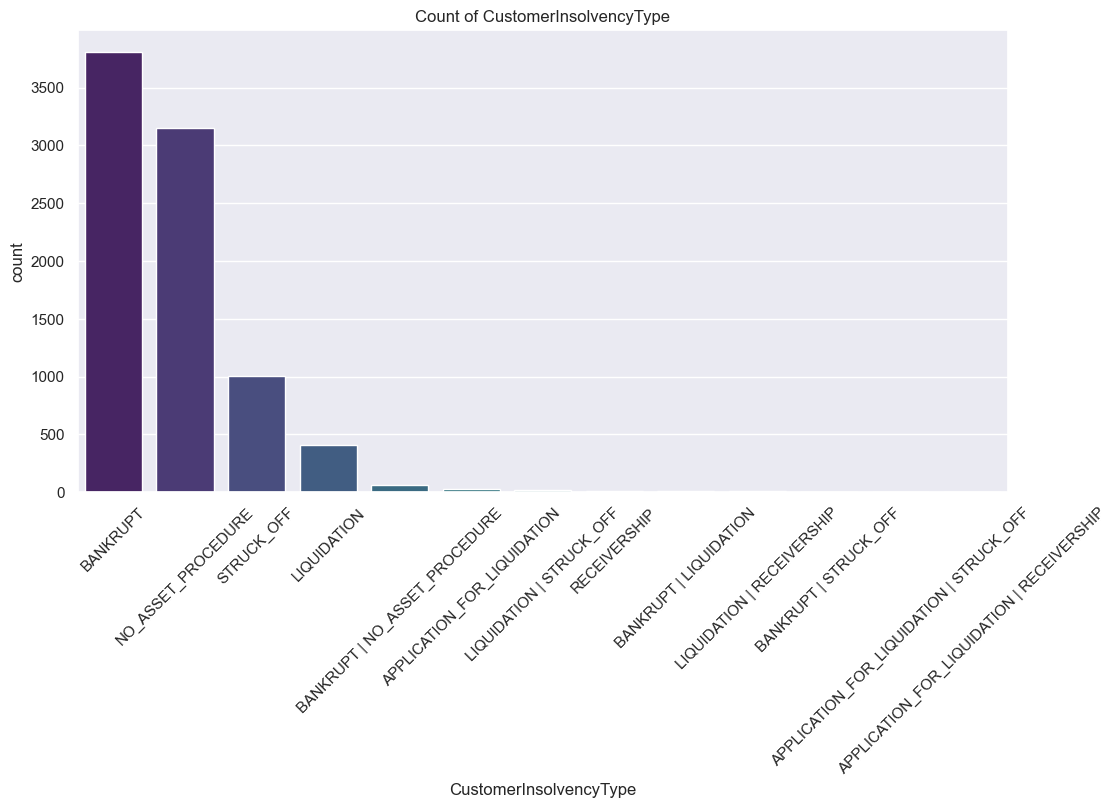


************************************************************************************************************************

Column: IsLegal
Value Counts:
N    383024
Y      9714
Name: IsLegal, dtype: int64
Visualizations:


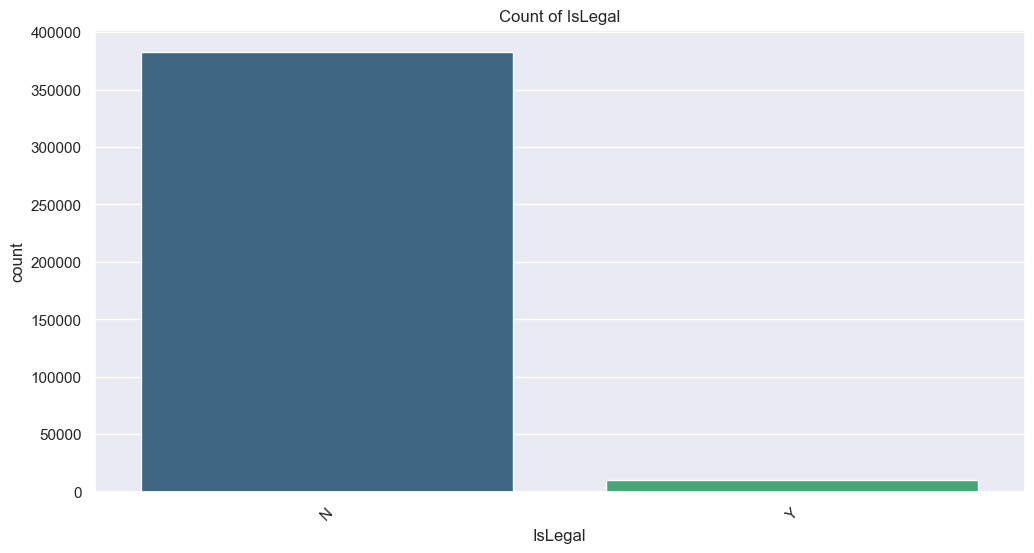


************************************************************************************************************************

Column: LastPaymentMethod
Value Counts:
Cheque                      52114
Automatic Payment           27338
Direct Credit                8798
Direct Debit                 5465
Unknown                      3702
Cash                         3359
Credit Card / Debit Card     1122
Direct Transfer                31
Mastercard                      7
Name: LastPaymentMethod, dtype: int64
Visualizations:


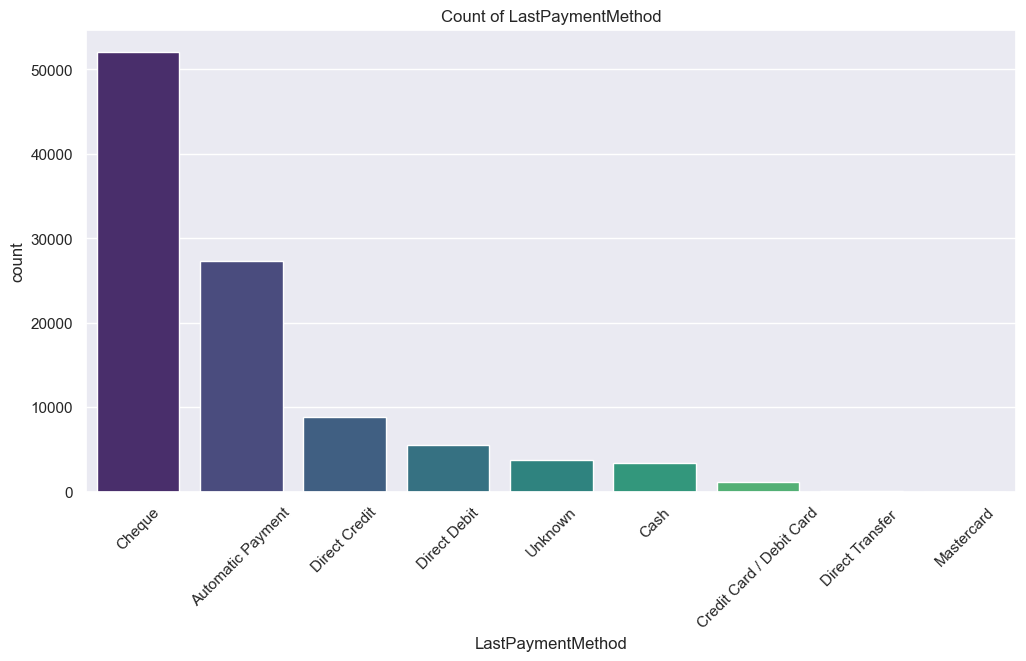


************************************************************************************************************************



In [29]:
# Get a list of categorical column names
categorical_columns = [col for col in df.select_dtypes(exclude='number').columns if col != 'OriginalCreditor_Redacted']

for column in categorical_columns:
    print(f"Column: {column}")
    
    print("Value Counts:")
    print(df[column].value_counts())
    
    print("Visualizations:")
    
    # Bar plot for categorical data
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Count of {column}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    
    plt.show()
    
    print("\n" + "*" * 120 + "\n")

In [30]:
outlier_info = {}

for column in numerical_columns:
    # Calculate IQR, lower_bound, and upper_bound for each column
    Q1 = df[column].describe()['25%']
    Q3 = df[column].describe()['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for each column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': outliers.shape[0],
        'outliers_description': outliers[column].describe()
    }

# Print outlier information for each numerical column
for column, info in outlier_info.items():
    print(f"Outliers Analysis for '{column}' (using IQR method):")
    print(f"- Based on the IQR method, there are {info['num_outliers']} considered as outliers.")
    print(f"- These outliers have an average {column} of approximately {info['outliers_description']['mean']:.2f}.")
    print(f"- The range for these outliers is from {info['outliers_description']['min']:.2f} to {info['outliers_description']['max']:.2f}.")
    print("\nOutliers Description:")
    print(info['outliers_description'])
    print("\n" + "*" * 120 + "\n")

Outliers Analysis for 'CurrentBalance' (using IQR method):
- Based on the IQR method, there are 41604 considered as outliers.
- These outliers have an average CurrentBalance of approximately 7680.14.
- The range for these outliers is from -7717.20 to 441681.52.

Outliers Description:
count     41604.000000
mean       7680.143783
std       10477.788708
min       -7717.200000
25%        3708.732500
50%        5158.310000
75%        8188.962500
max      441681.520000
Name: CurrentBalance, dtype: float64

************************************************************************************************************************

Outliers Analysis for 'DebtLoadPrincipal' (using IQR method):
- Based on the IQR method, there are 43429 considered as outliers.
- These outliers have an average DebtLoadPrincipal of approximately 8224.73.
- The range for these outliers is from 3202.08 to 844343.00.

Outliers Description:
count     43429.000000
mean       8224.733305
std       11332.228697
min        3

In [31]:
df[df['CustomerAge'] < 0]

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
9029                  Creditor 7            0.00              36.37   
11172                 Creditor 7            0.00              36.00   
15502                 Creditor 7            0.00              53.00   
15609                 Creditor 7           47.65              38.00   
22293                Creditor 11            0.00            1181.42   
23433                 Creditor 7            0.00              80.00   
23983                Creditor 10           18.16             662.69   
24652                Creditor 10            0.00             104.83   
24724                Creditor 10            0.00            4780.00   
25313                Creditor 10            0.00             343.90   
26301                Creditor 10            0.00             400.30   
26365                Creditor 10            0.00            4690.36   
26507                Creditor 10            0.00             598.45   
27900                 Creditor 7           17.26              45.00   
32566                 Creditor 7            0.00              65.00   
33029                 Creditor 7            0.00              65.00   
40723                 Creditor 7            0.00              55.00   
134727               Creditor 25          373.73             373.73   
180047               Creditor 33          485.00             485.00   
247888                Creditor 6            0.00            1960.59   

        BalanceAtDebtLoad  PurchasePrice        ProductOrDebtType  \
9029                46.00           4.22                    Other   
11172               45.29           4.22                    Other   
15502               65.29           4.22                    Other   
15609               47.65           4.22                    Other   
22293             1181.42           4.22                    Other   
23433               97.06           4.22                    Other   
23983              808.16           4.96                    Other   
24652              127.84           4.96                    Other   
24724             5829.27           4.96                    Other   
25313              419.39           4.96                    Other   
26301              488.17           4.96                    Other   
26365             5719.95           4.96                    Other   
26507              729.82           4.96                    Other   
27900               59.38           4.22                    Other   
32566               84.38           4.22                    Other   
33029               84.38           4.22                    Other   
40723               71.88           4.22                    Other   
134727             373.73          11.70                    Other   
180047             485.00           3.60  Utilities/Telco - Other   
247888            1960.59           4.22                    Other   

       CollectionStatus IsStatBarred ClosureReason InBankruptcy  ...  \
9029       PAID_IN_FULL            N           NaN            N  ...   
11172      PAID_IN_FULL            N           NaN            N  ...   
15502      PAID_IN_FULL            N           NaN            N  ...   
15609           PASSIVE            Y           NaN            N  ...   
22293      PAID_IN_FULL            N           NaN            N  ...   
23433      PAID_IN_FULL            N           NaN            N  ...   
23983           PASSIVE            Y           NaN            N  ...   
24652      PAID_IN_FULL            N           NaN            N  ...   
24724      PAID_IN_FULL            N           NaN            N  ...   
25313      PAID_IN_FULL            N           NaN            N  ...   
26301      PAID_IN_FULL            N           NaN            N  ...   
26365      PAID_IN_FULL            N           NaN            N  ...   
26507      PAID_IN_FULL            N           NaN            N  ...   
27900           PASSIVE            Y           NaN       

In [32]:
df['CustomerAge'] = df['CustomerAge'].abs()

In [33]:
df[df['CustomerAge'] < 0]

Empty DataFrame
Columns: [OriginalCreditor_Redacted, CurrentBalance, DebtLoadPrincipal, BalanceAtDebtLoad, PurchasePrice, ProductOrDebtType, CollectionStatus, IsStatBarred, ClosureReason, InBankruptcy, AccountInsolvencyType, CustomerInsolvencyType, IsLegal, LastPaymentAmount, LastPaymentMethod, NumLiableParties, CustomerAge, NumPhones, NumEmails, NumAddresses, FrequencyEncodedCreditor]
Index: []

[0 rows x 21 columns]

In [35]:
df.columns

Index(['OriginalCreditor_Redacted', 'CurrentBalance', 'DebtLoadPrincipal',
       'BalanceAtDebtLoad', 'PurchasePrice', 'ProductOrDebtType',
       'CollectionStatus', 'IsStatBarred', 'ClosureReason', 'InBankruptcy',
       'AccountInsolvencyType', 'CustomerInsolvencyType', 'IsLegal',
       'LastPaymentAmount', 'LastPaymentMethod', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses',
       'FrequencyEncodedCreditor'],
      dtype='object')

<AxesSubplot:xlabel='IsStatBarred', ylabel='CurrentBalance'>

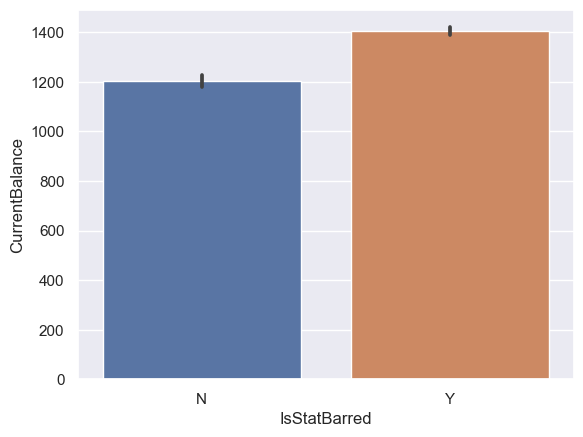

In [43]:
sns.barplot(x=df['IsStatBarred'], y=df['CurrentBalance'], estimator=np.mean)

<AxesSubplot:xlabel='IsStatBarred', ylabel='DebtLoadPrincipal'>

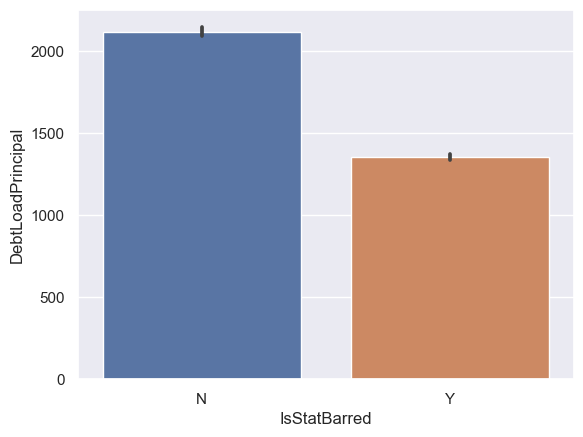

In [42]:
sns.barplot(x=df['IsStatBarred'], y=df['DebtLoadPrincipal'], estimator=np.mean)

In [ ]:
x_axis = 

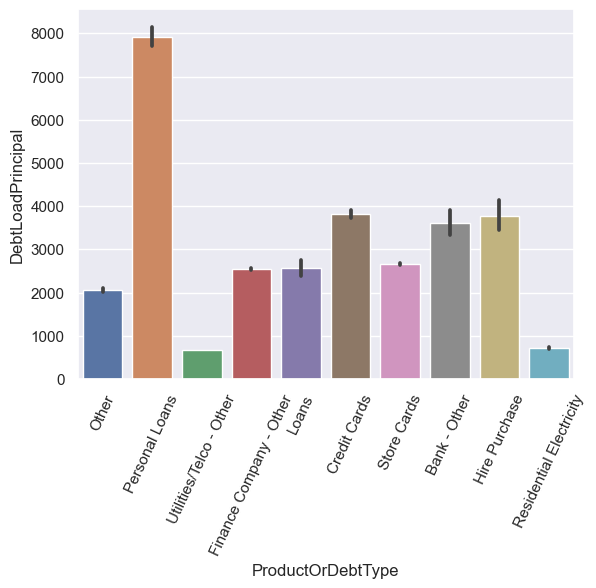

In [55]:
sns.barplot(x=df['ProductOrDebtType'], y=df['DebtLoadPrincipal'], estimator=np.mean)
plt.xticks(rotation=65)
plt.show()

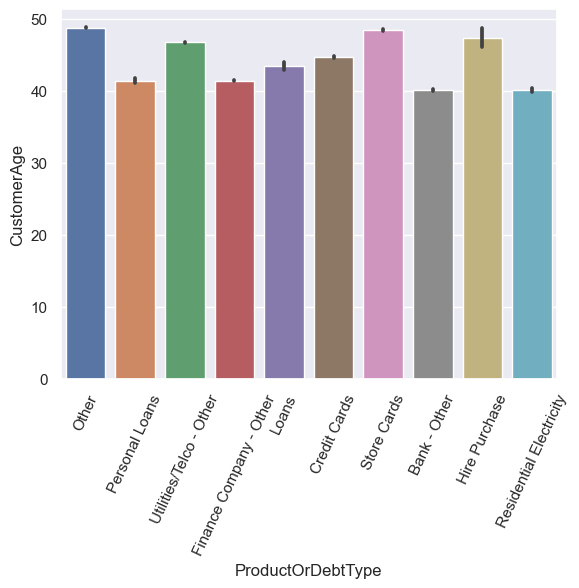

In [62]:
# CollectionStatus
sns.barplot(x=df['ProductOrDebtType'], y=df['CustomerAge'], estimator=np.mean)
plt.xticks(rotation=65)
plt.show()

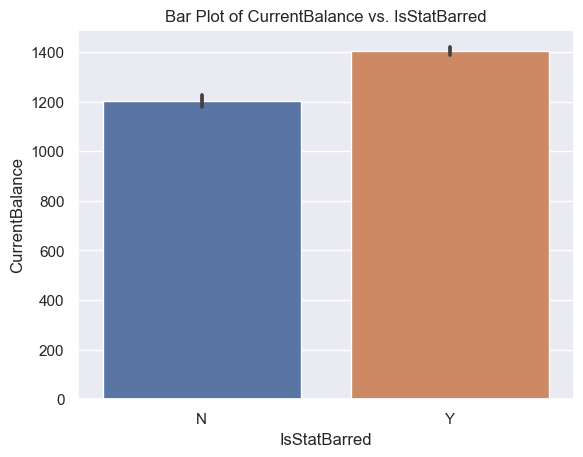

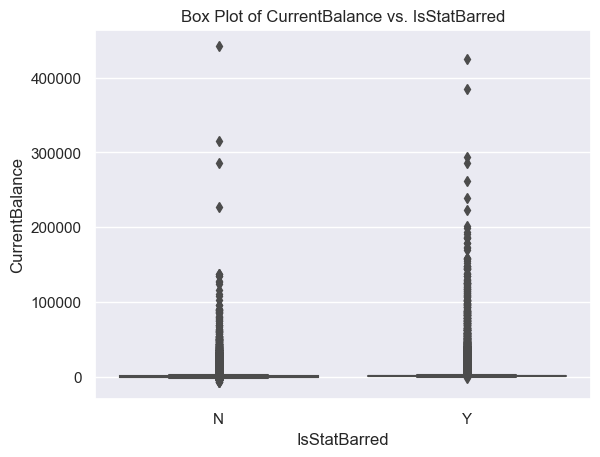

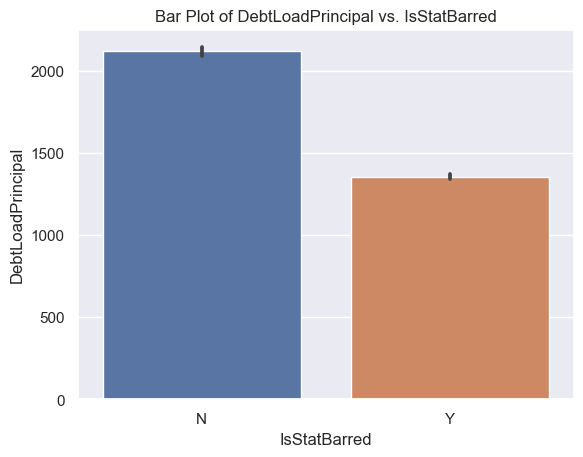

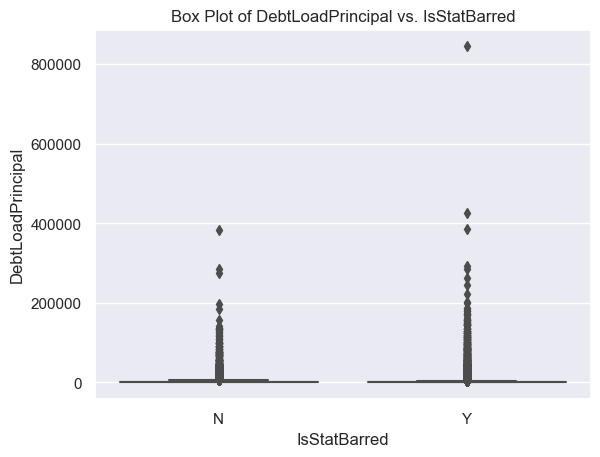

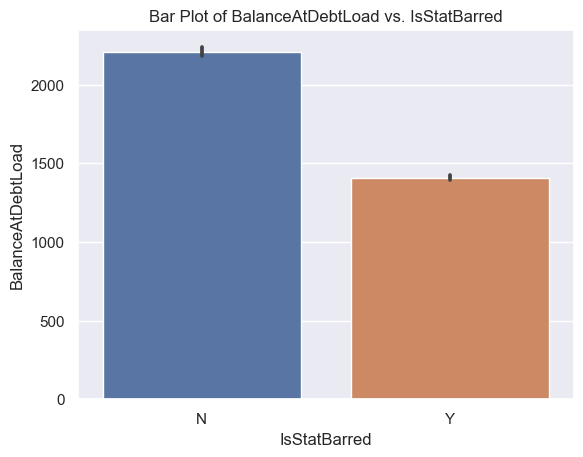

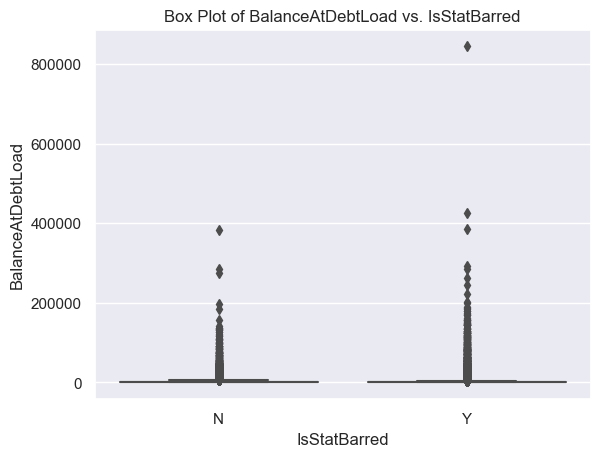

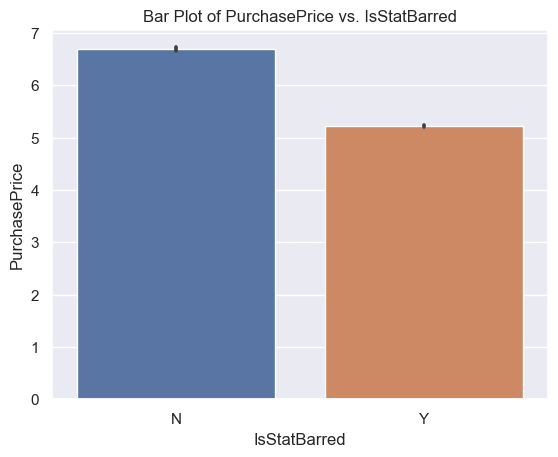

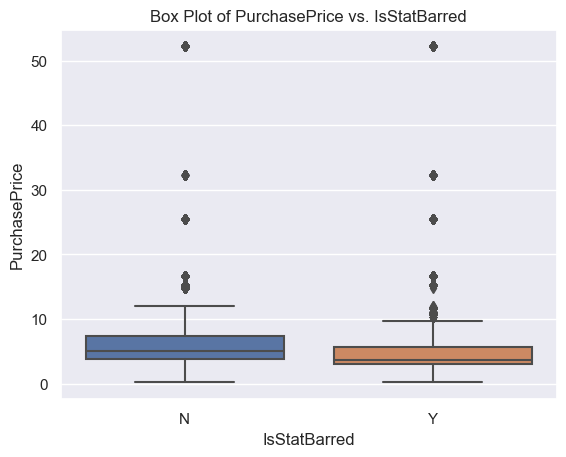

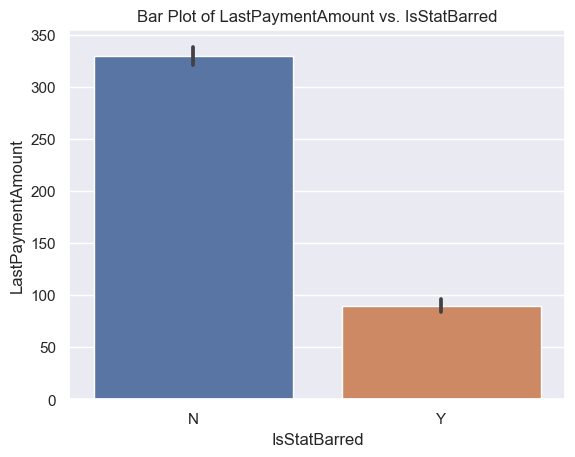

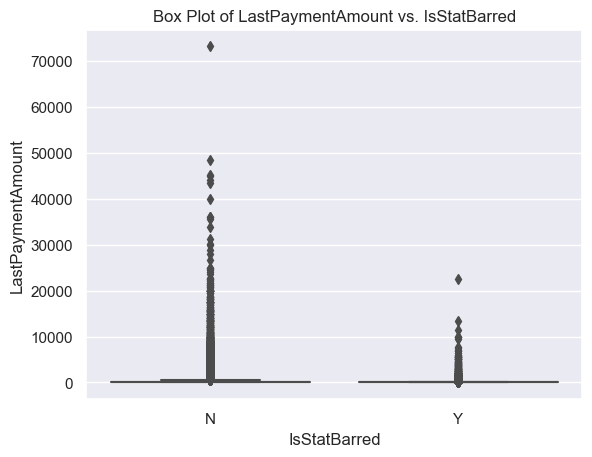

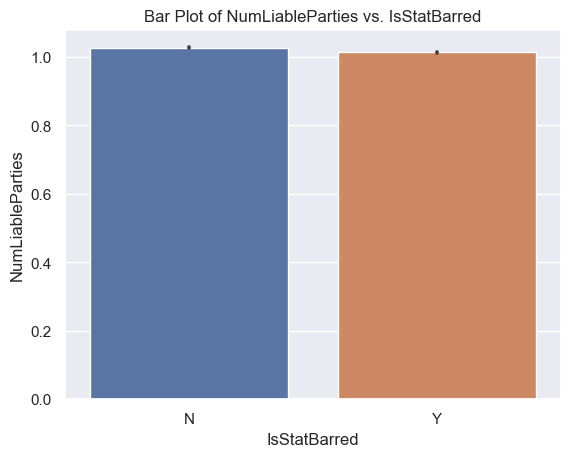

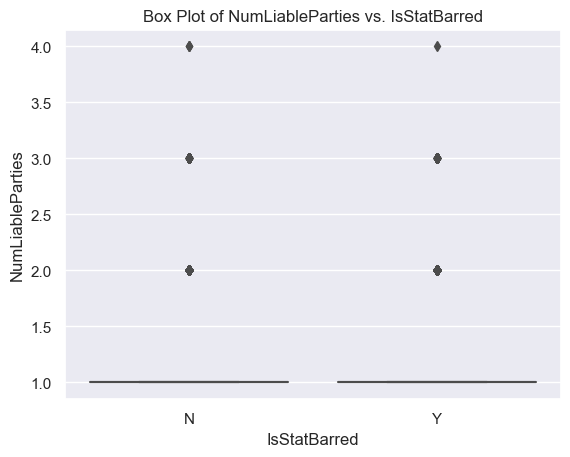

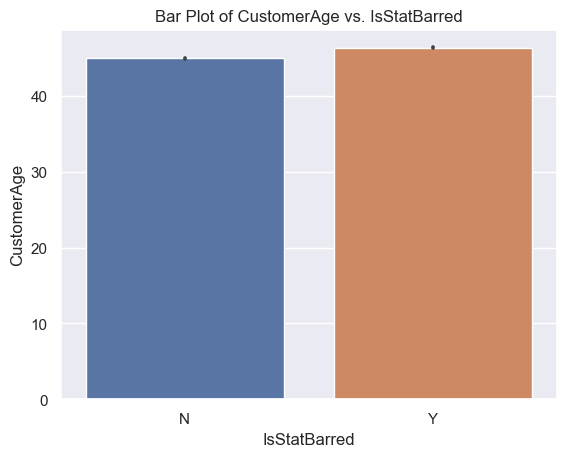

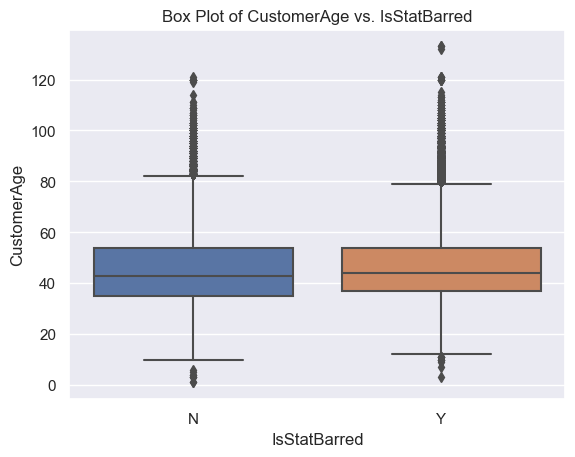

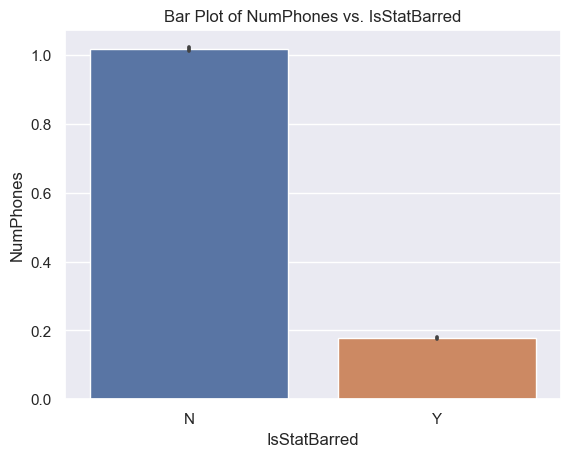

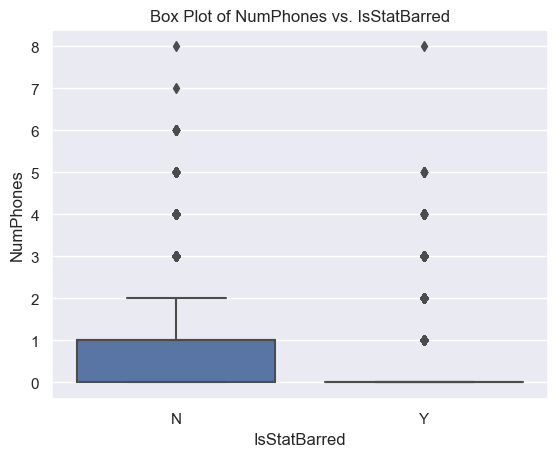

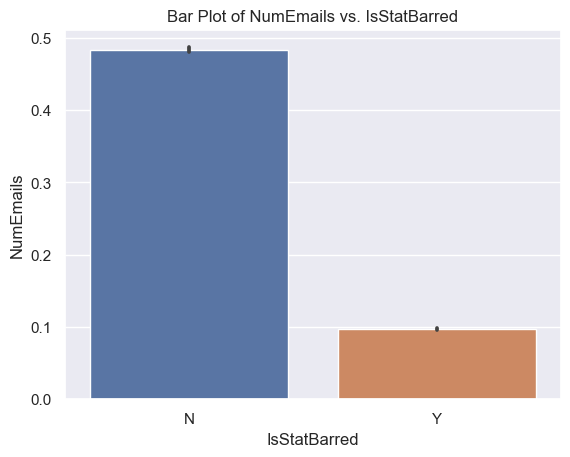

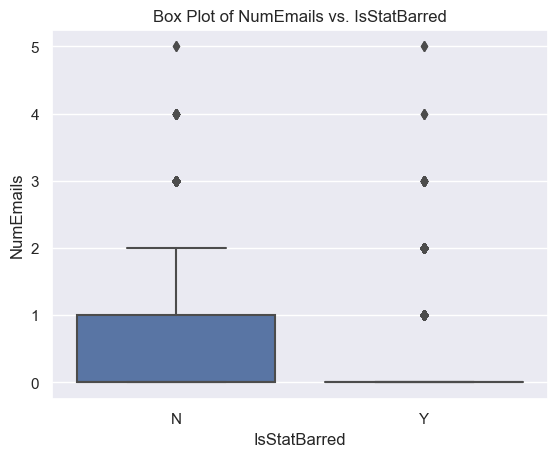

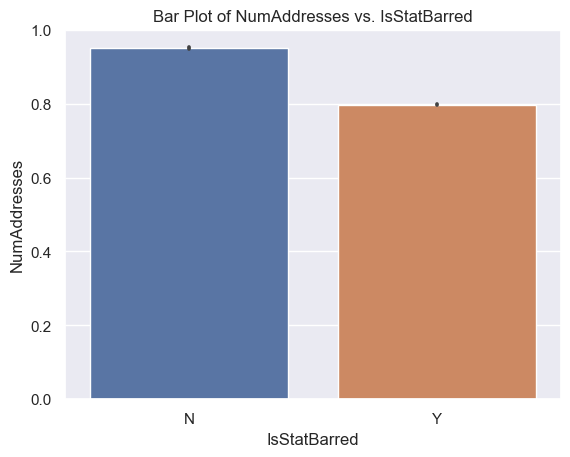

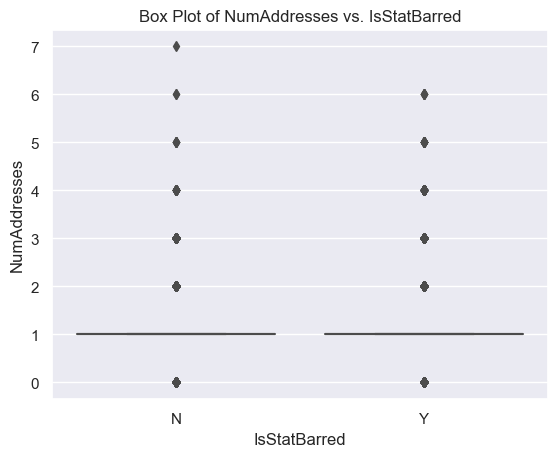

In [64]:
for column in numerical_columns:
    # Create a bar plot for each numerical column against 'IsStatBarred'
    sns.barplot(x=df['IsStatBarred'], y=df[column], estimator=np.mean)
    
    # Add a title to the plot
    plt.title(f'Bar Plot of {column} vs. IsStatBarred')
    
    # Show the plot
    plt.show()
    
    # Create a box plot for each numerical column against 'IsStatBarred'
    sns.boxplot(x=df['IsStatBarred'], y=df[column])
    
    # Add a title to the box plot
    plt.title(f'Box Plot of {column} vs. IsStatBarred')
    
    # Show the box plot
    plt.show()

In [67]:
df[df['CustomerAge'] < 18]

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
6624                  Creditor 7            0.00              37.00   
7236                  Creditor 7            0.00              37.00   
9029                  Creditor 7            0.00              36.37   
11172                 Creditor 7            0.00              36.00   
27900                 Creditor 7           17.26              45.00   
...                          ...             ...                ...   
304291               Creditor 47          153.08             139.16   
306156               Creditor 47          199.16             181.05   
306176               Creditor 47          304.82             277.11   
308526               Creditor 47          920.76             837.05   
308619               Creditor 47          499.91             454.46   

        BalanceAtDebtLoad  PurchasePrice        ProductOrDebtType  \
6624                46.63           4.22                    Other   
7236                46.63           4.22                    Other   
9029                46.00           4.22                    Other   
11172               45.29           4.22                    Other   
27900               59.38           4.22                    Other   
...                   ...            ...                      ...   
304291             139.16           2.32  Utilities/Telco - Other   
306156             181.05           2.32  Utilities/Telco - Other   
306176             277.11           2.32  Utilities/Telco - Other   
308526             837.05           2.32  Utilities/Telco - Other   
308619             454.46           2.32  Utilities/Telco - Other   

       CollectionStatus IsStatBarred ClosureReason InBankruptcy  ...  \
6624       PAID_IN_FULL            N           NaN            N  ...   
7236       PAID_IN_FULL            N           NaN            N  ...   
9029       PAID_IN_FULL            N           NaN            N  ...   
11172      PAID_IN_FULL            N           NaN            N  ...   
27900           PASSIVE            Y           NaN            N  ...   
...                 ...          ...           ...          ...  ...   
304291           ACTIVE            Y           NaN            N  ...   
306156           ACTIVE            Y           NaN            N  ...   
306176           ACTIVE            Y           NaN            N  ...   
308526           ACTIVE            Y           NaN            N  ...   
308619           ACTIVE            Y           NaN            N  ...   

       CustomerInsolvencyType IsLegal LastPaymentAmount  LastPaymentMethod  \
6624                      NaN       N             46.63             Cheque   
7236                      NaN       N             46.63             Cheque   
9029                      NaN       N             40.00             Cheque   
11172                     NaN       N             45.29             Cheque   
27900                     NaN       N             30.00             Cheque   
...                       ...     ...               ...                ...   
304291                    NaN       N               NaN                NaN   
306156                    NaN       N               NaN                NaN   
306176                    NaN       N               NaN                NaN   
308526                    NaN       N               NaN                NaN   
308619                    NaN       N               NaN                NaN   

       NumLiableParties  CustomerAge  NumPhones  NumEmails  NumAddresses  \
6624                1.0         10.0          1          0             1   
7236                1.0          4.0          1          0             1   
9029                1.0          3.0          1          0             1   
11172               1.0          3.0          1          0             1   
27900               1.0          3.0          1          0             1   
...                 ...          ...        ...        ...         

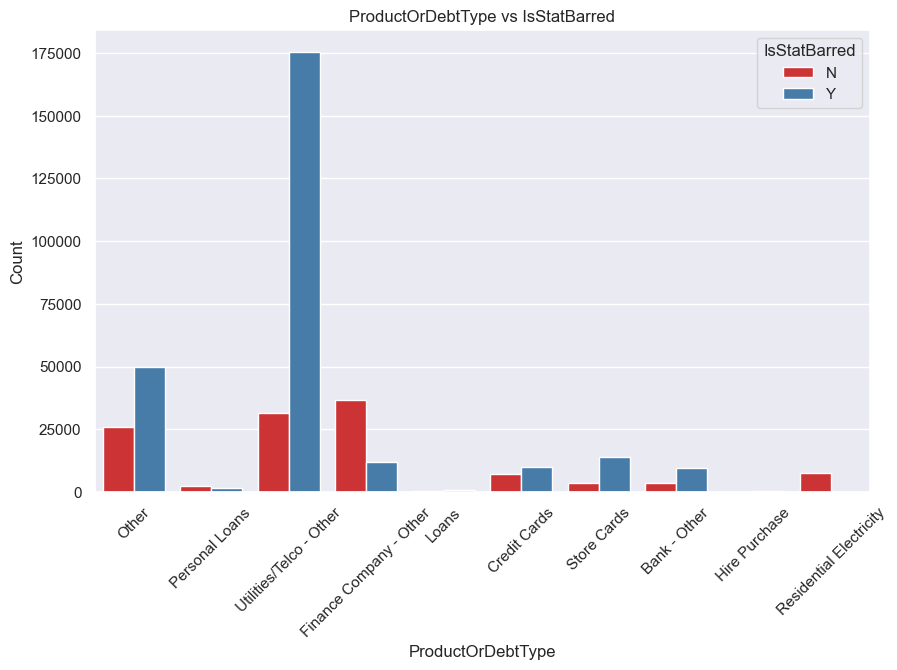

In [70]:
# Create a clustered bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x="ProductOrDebtType", hue="IsStatBarred", data=df, palette="Set1")

# Add labels and title
plt.xlabel("ProductOrDebtType")
plt.ylabel("Count")
plt.title("ProductOrDebtType vs IsStatBarred")

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the legend
plt.legend(title="IsStatBarred", loc="upper right")

# Show the plot
plt.show()

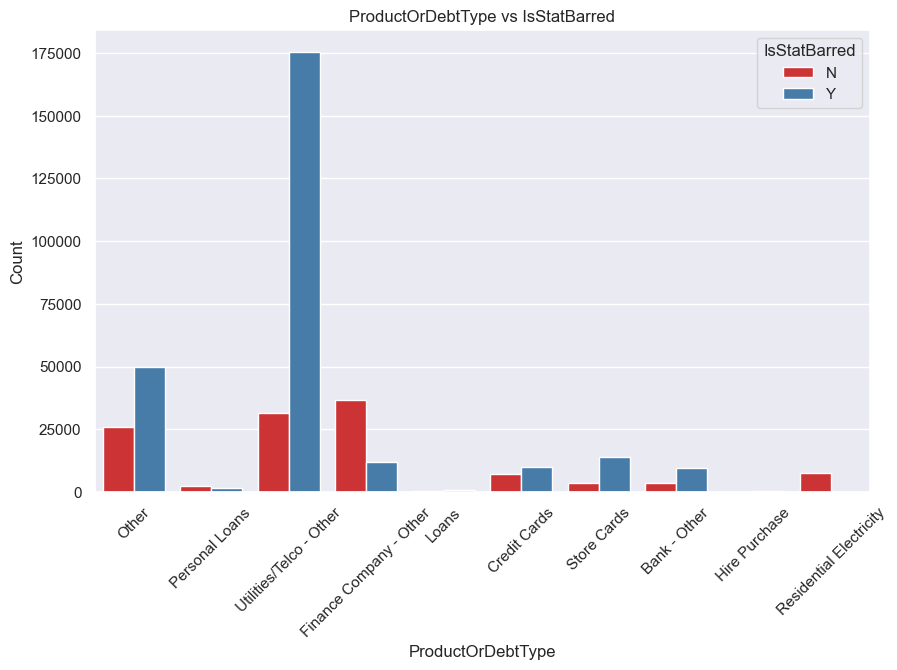

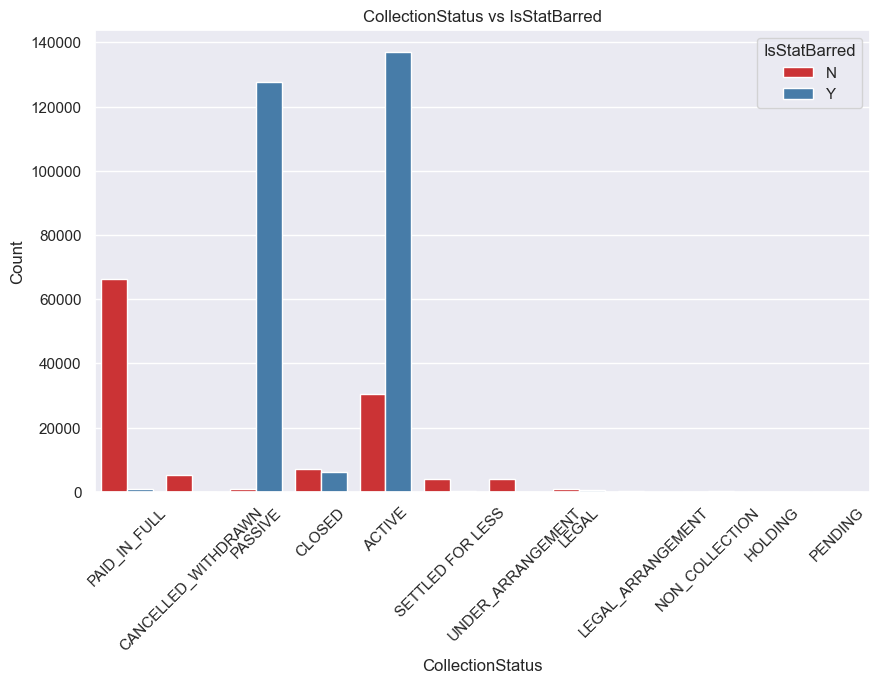

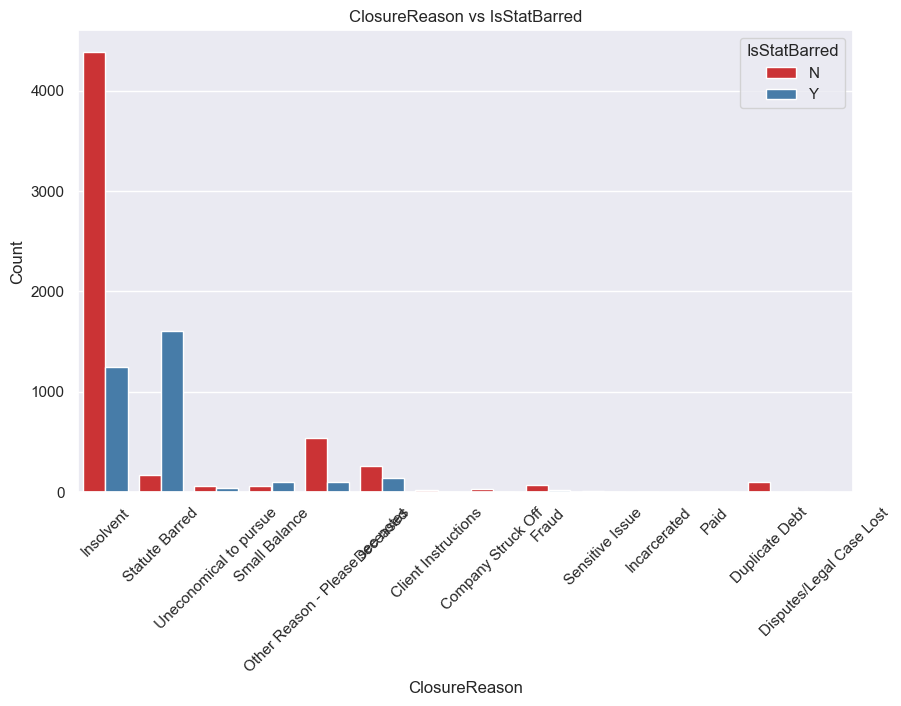

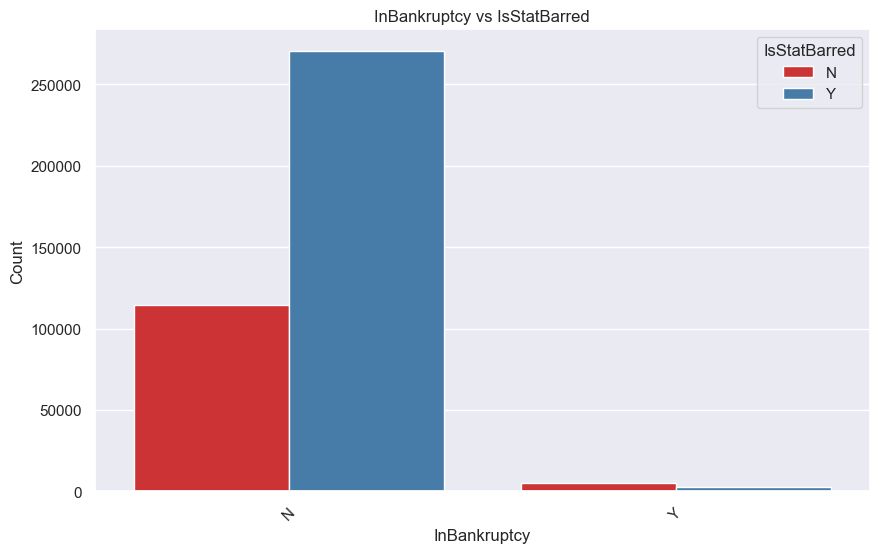

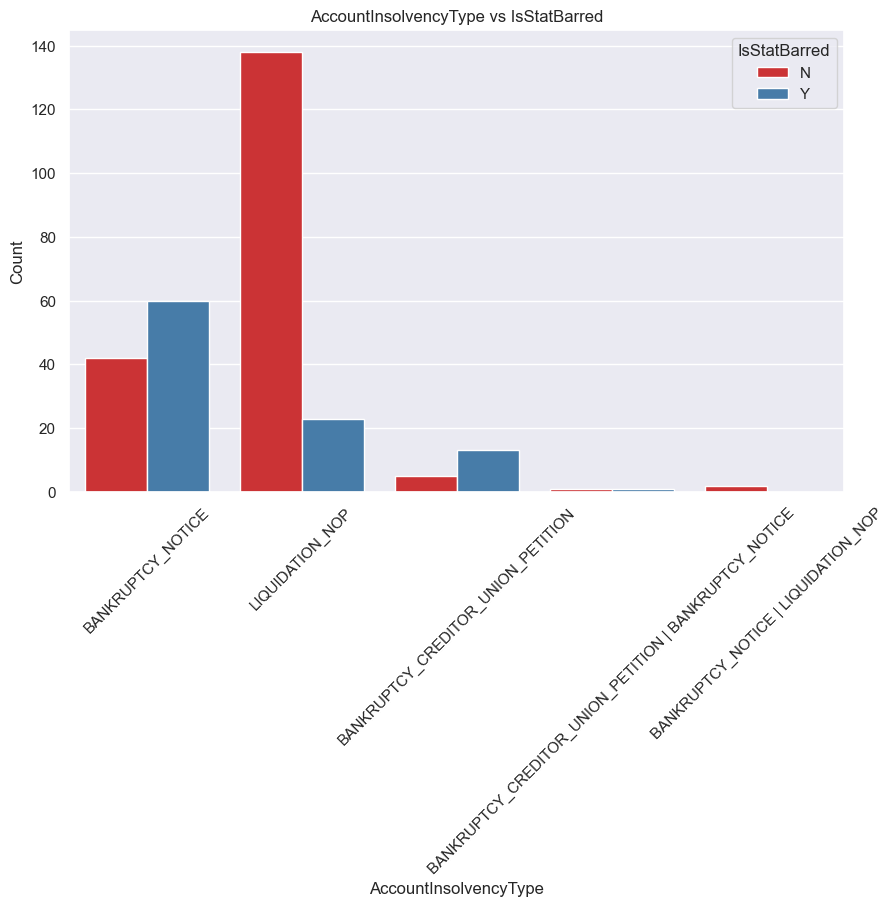

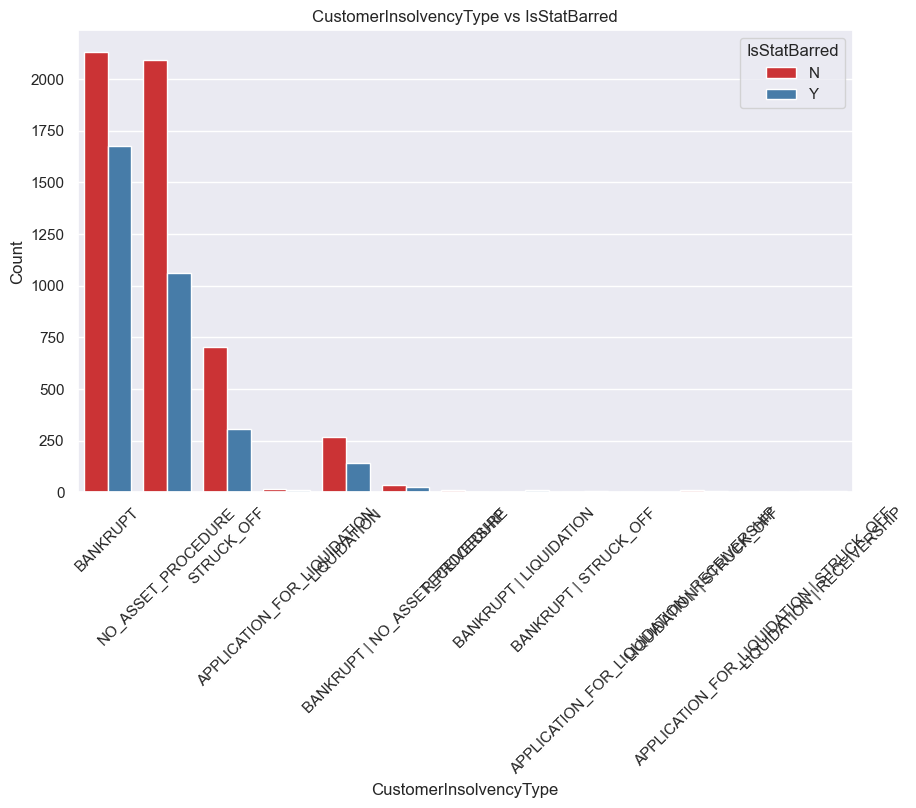

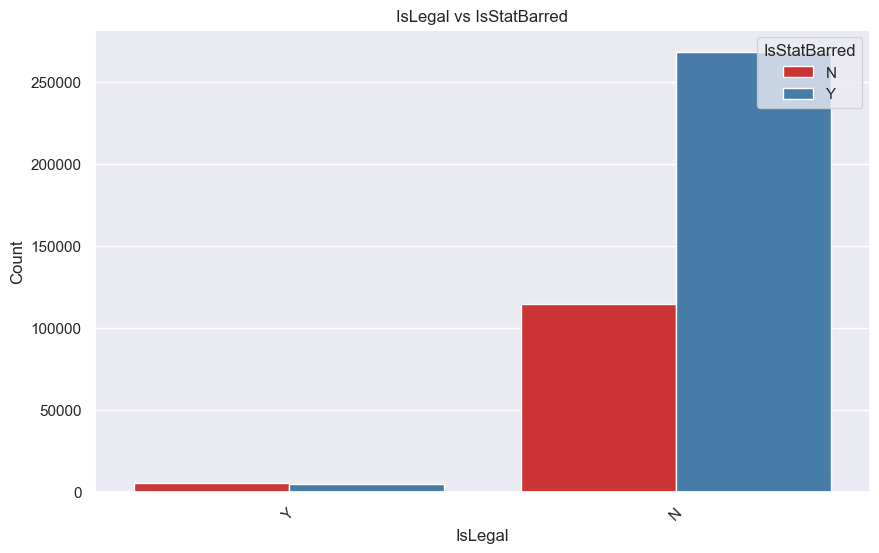

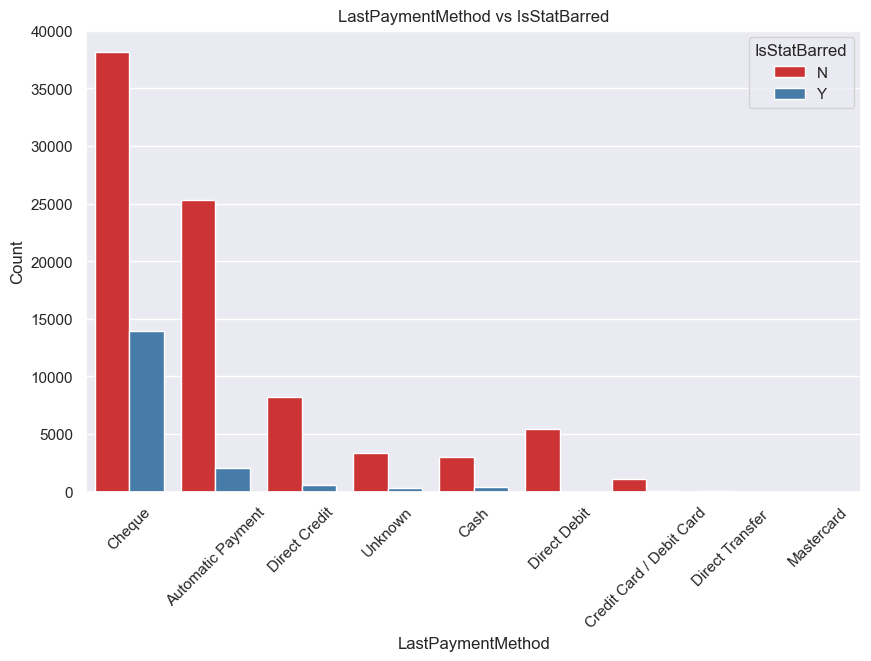

In [72]:
categorical_columns = [col for col in df.columns if col not in ['OriginalCreditor_Redacted', 'IsStatBarred'] and df[col].dtype == 'object']

# Create individual bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Create a clustered bar chart
    sns.countplot(x=column, hue="IsStatBarred", data=df, palette="Set1")

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"{column} vs IsStatBarred")

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    # Show the legend
    plt.legend(title="IsStatBarred", loc="upper right")

    plt.show()

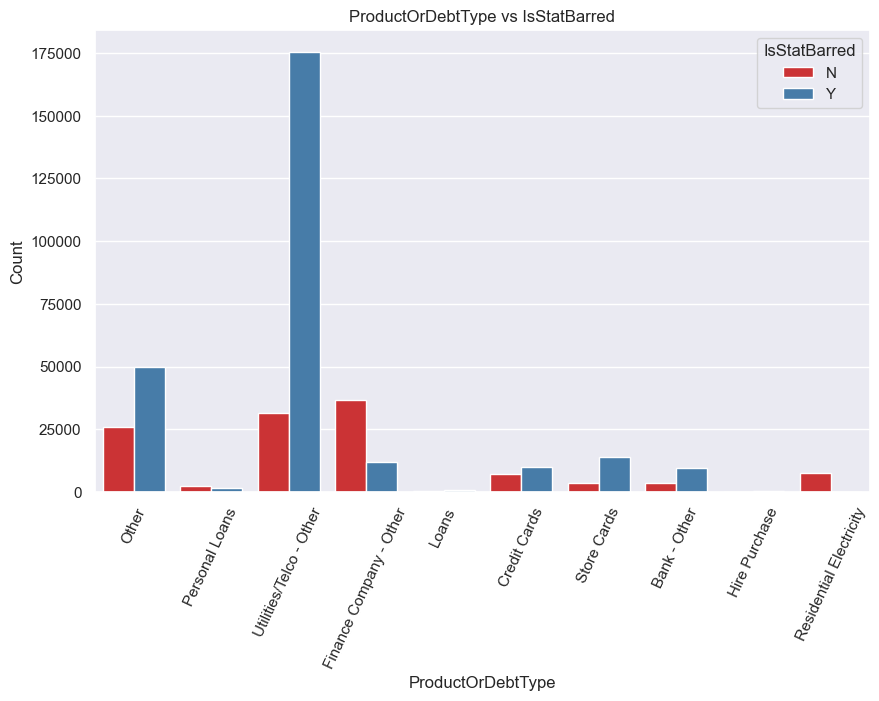

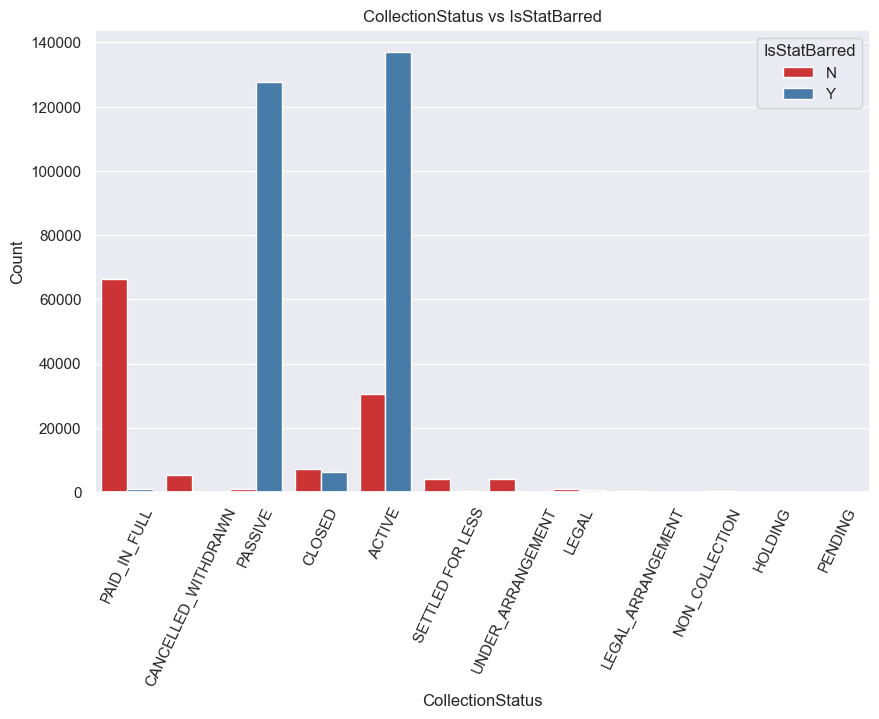

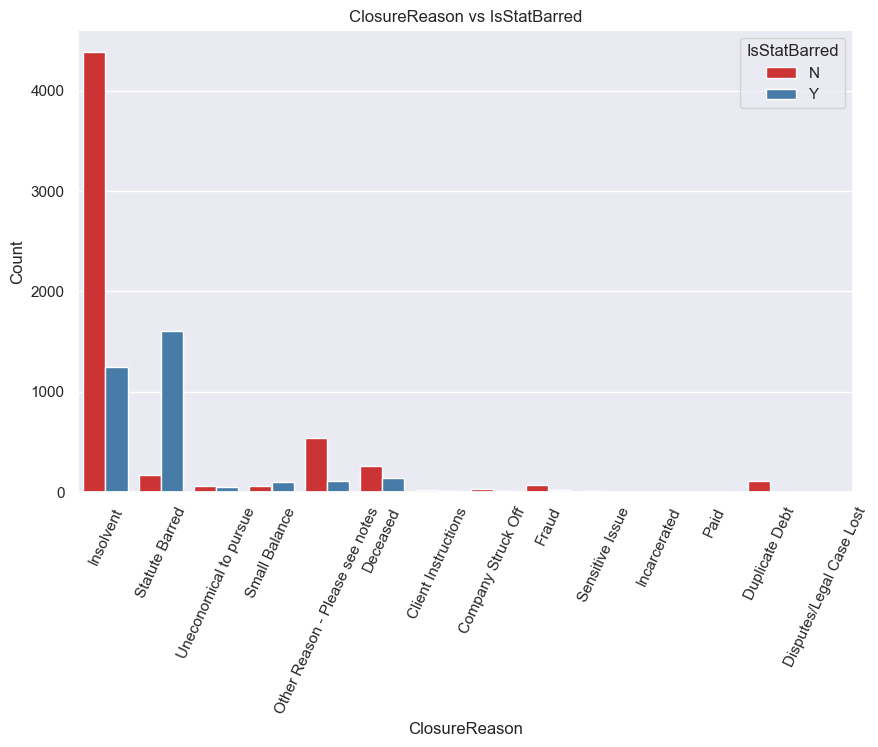

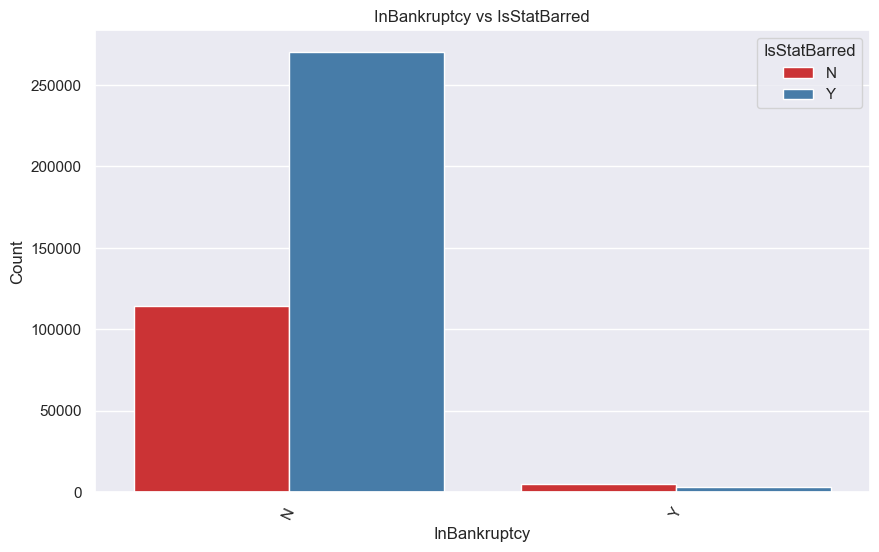

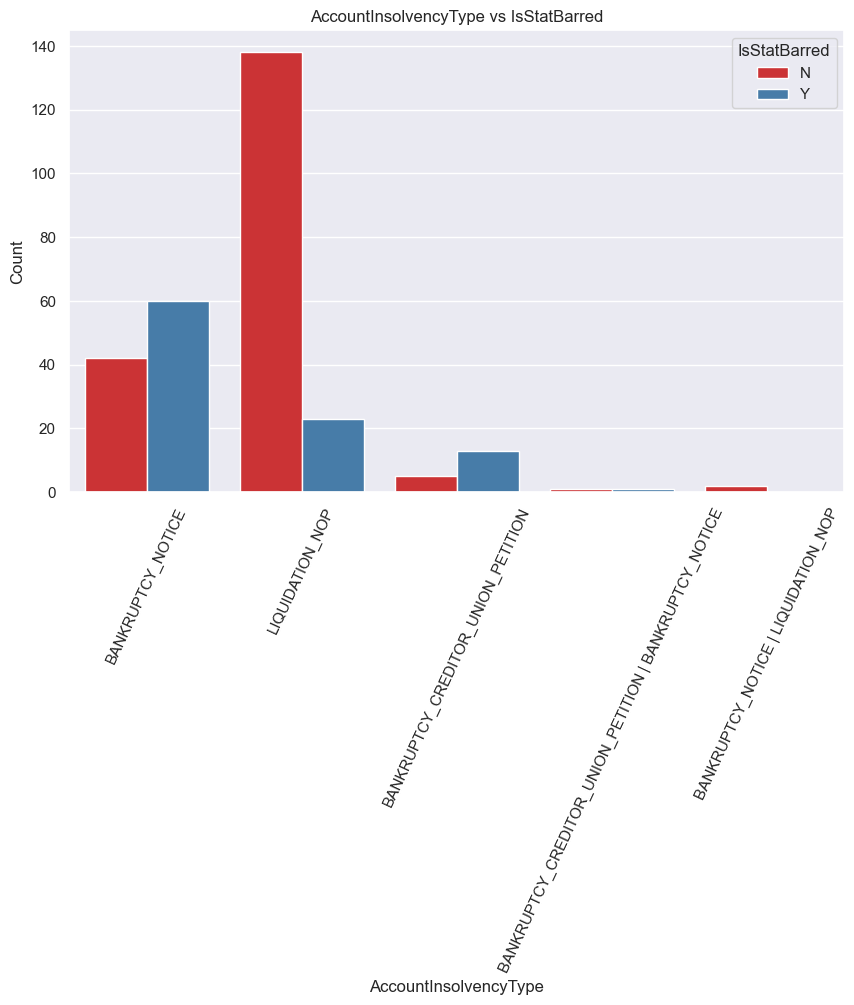

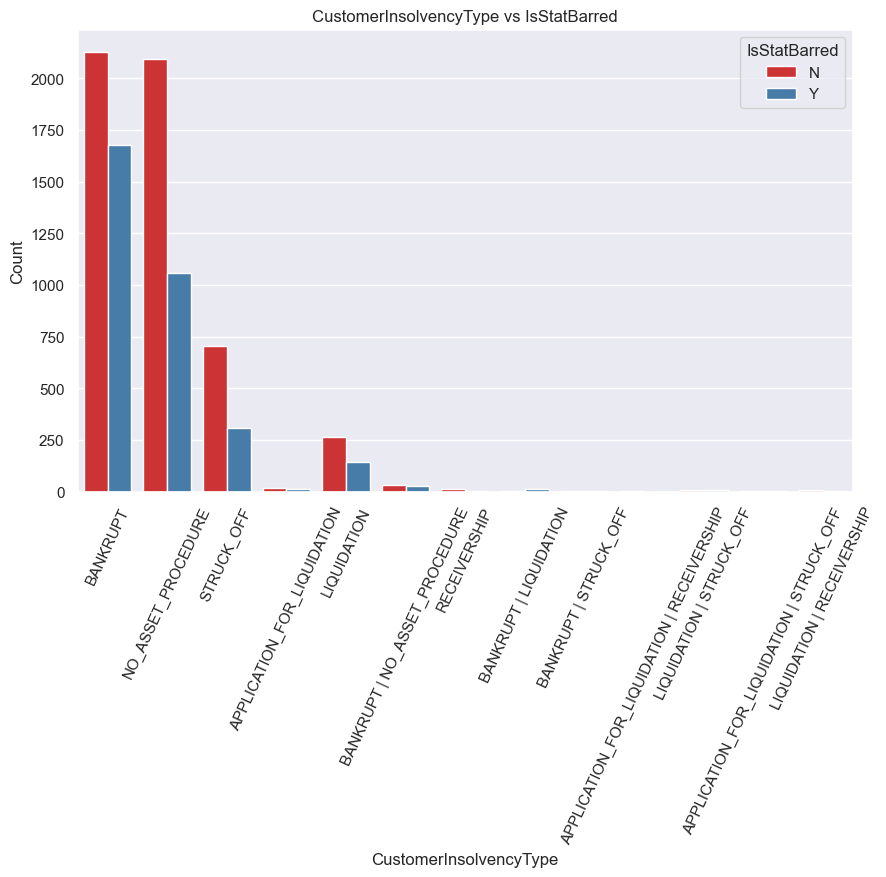

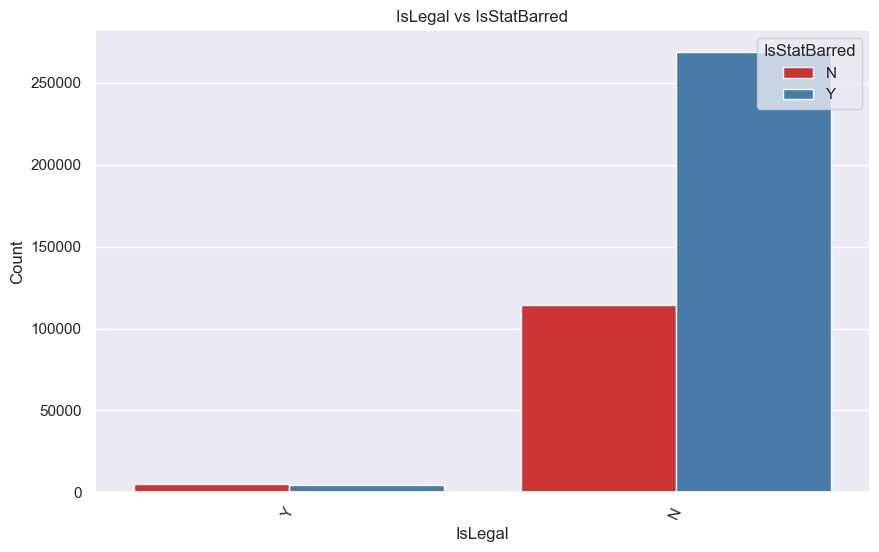

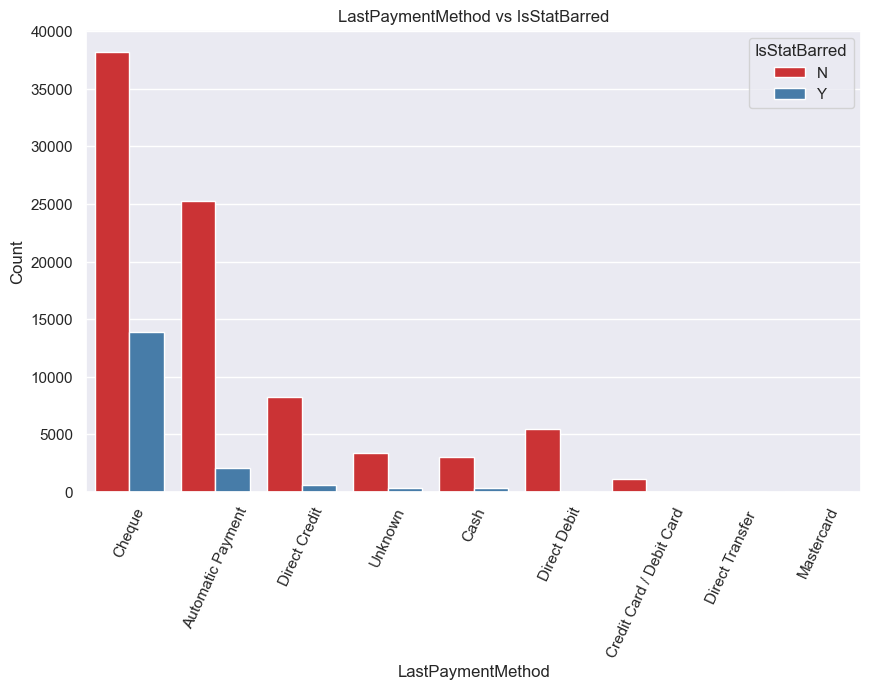

In [75]:
# List of categorical columns (excluding "OriginalCreditor_Redacted" and "IsStatBarred")
categorical_columns = [col for col in df.columns if col not in ['OriginalCreditor_Redacted', 'IsStatBarred'] and df[col].dtype == 'object']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Create a grouped bar chart
    sns.countplot(x=column, hue="IsStatBarred", data=df, palette="Set1")

    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"{column} vs IsStatBarred")

    plt.xticks(rotation=65)

    plt.legend(title="IsStatBarred", loc="upper right")

    plt.show()

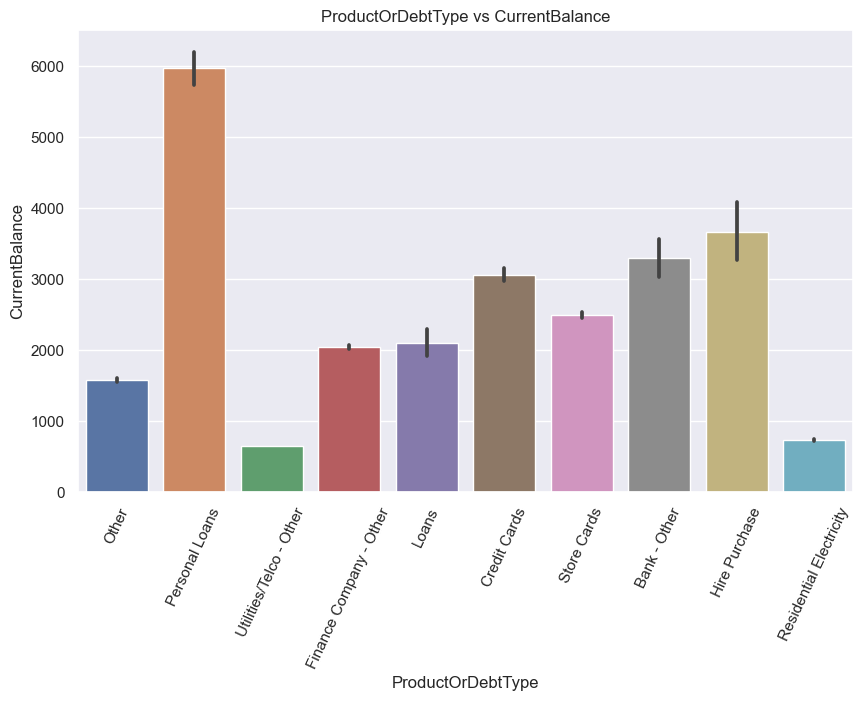

************************************************************************************************************************


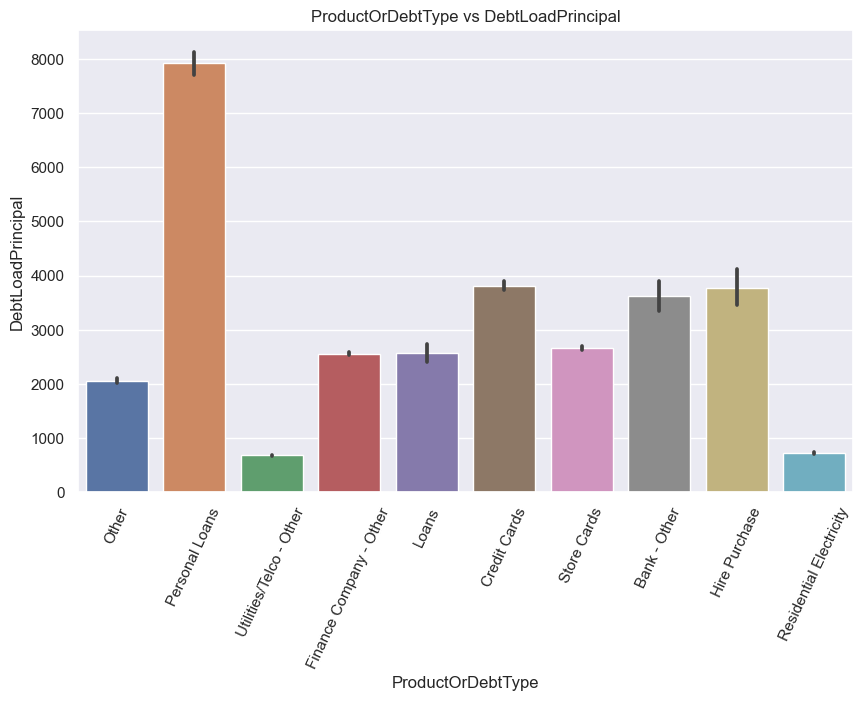

************************************************************************************************************************


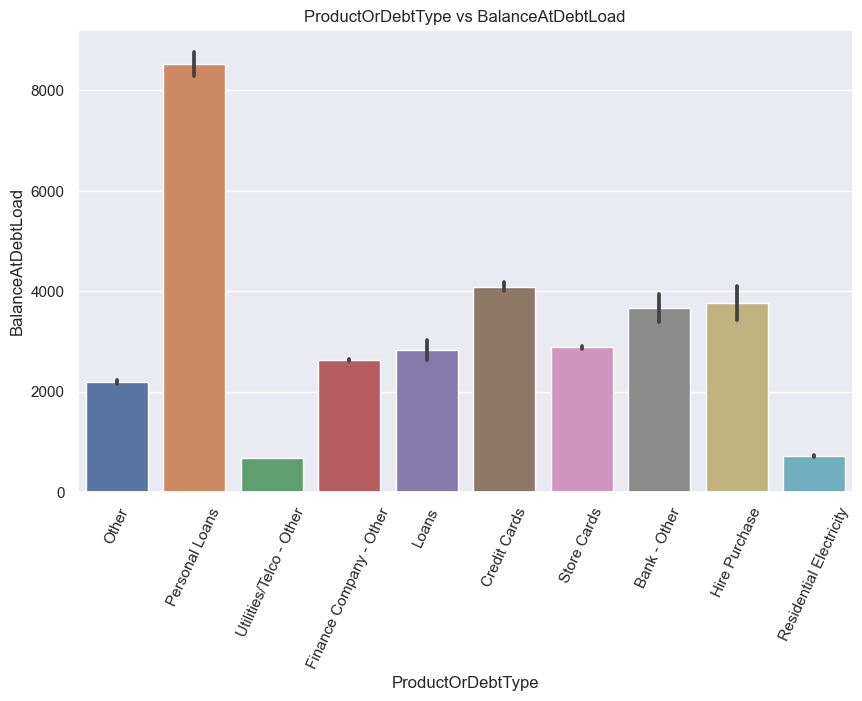

************************************************************************************************************************


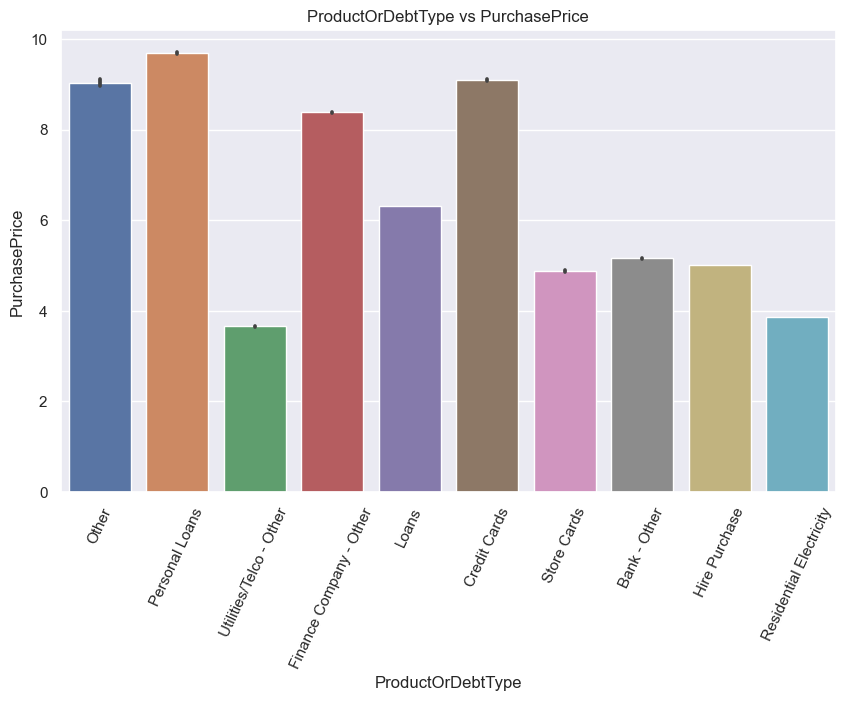

************************************************************************************************************************


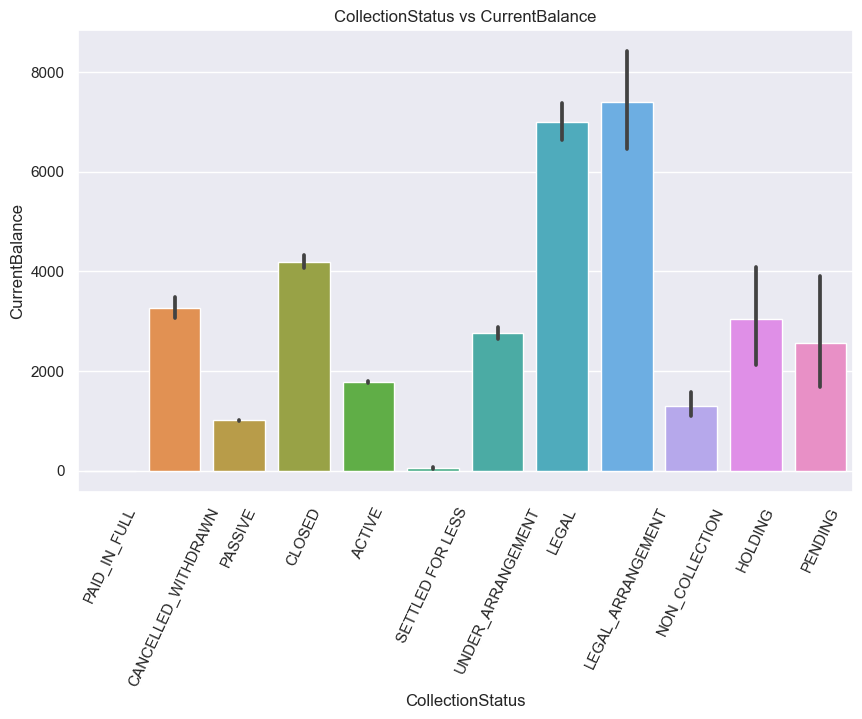

************************************************************************************************************************


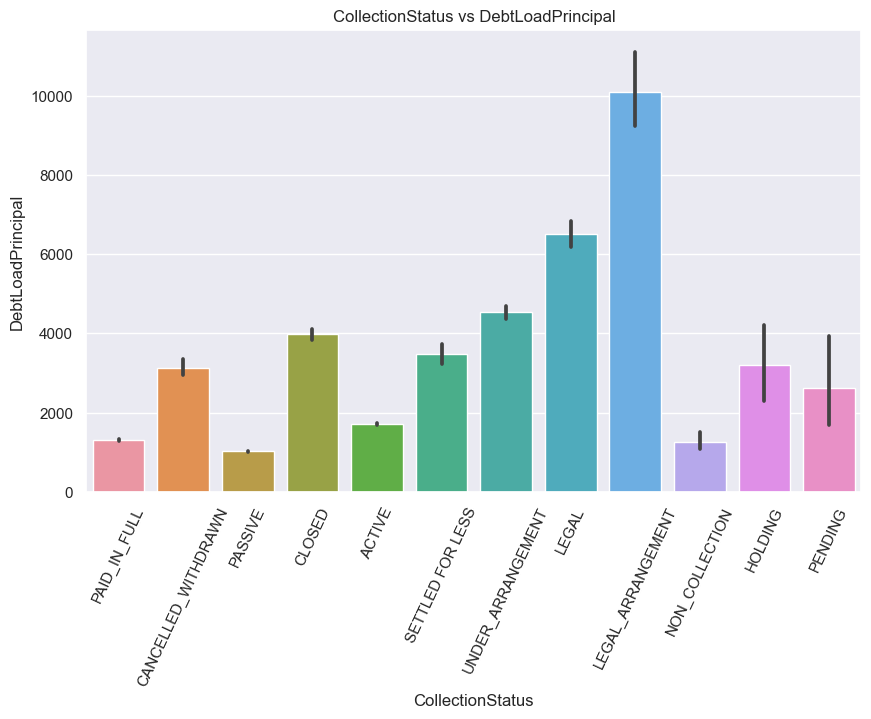

************************************************************************************************************************


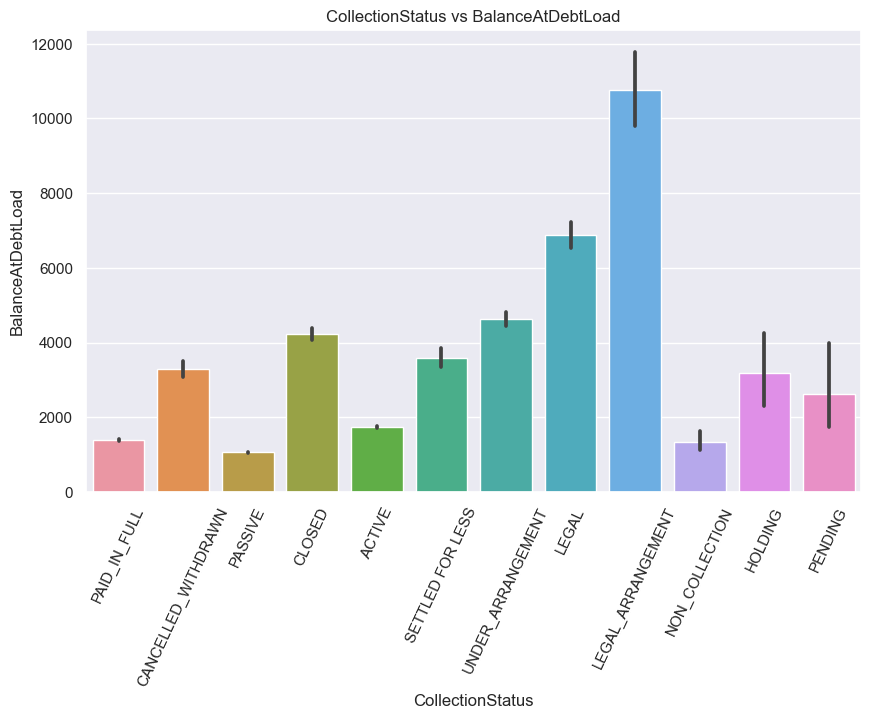

************************************************************************************************************************


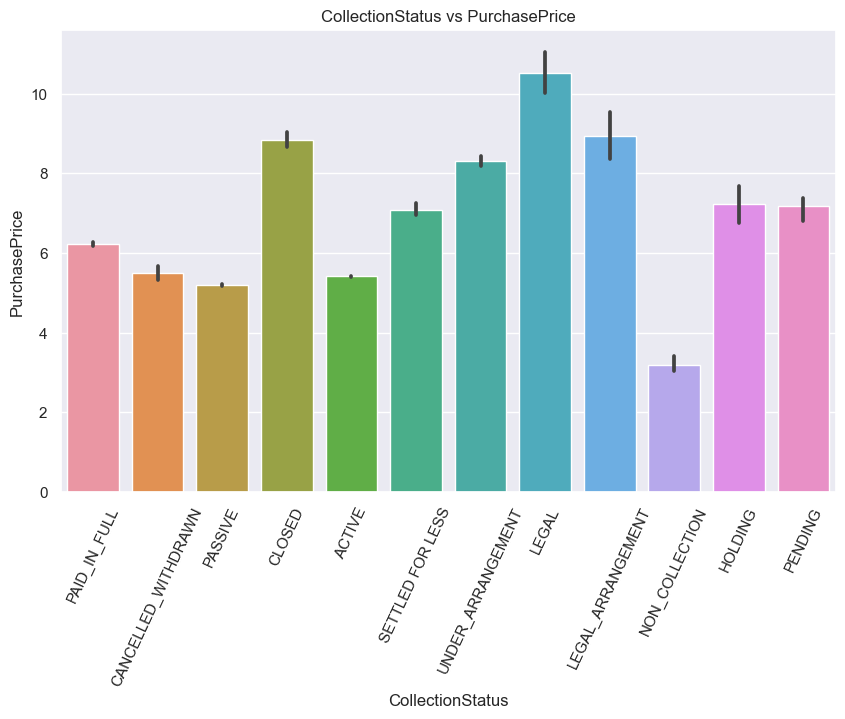

************************************************************************************************************************


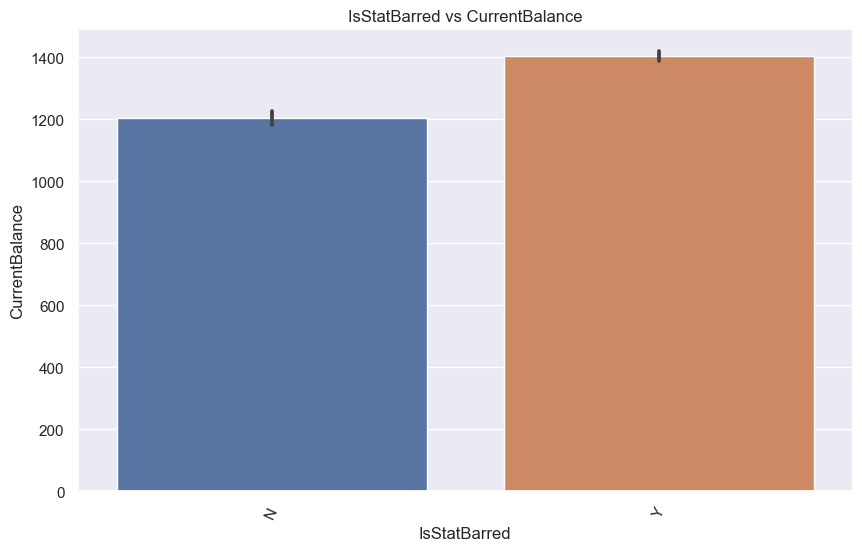

************************************************************************************************************************


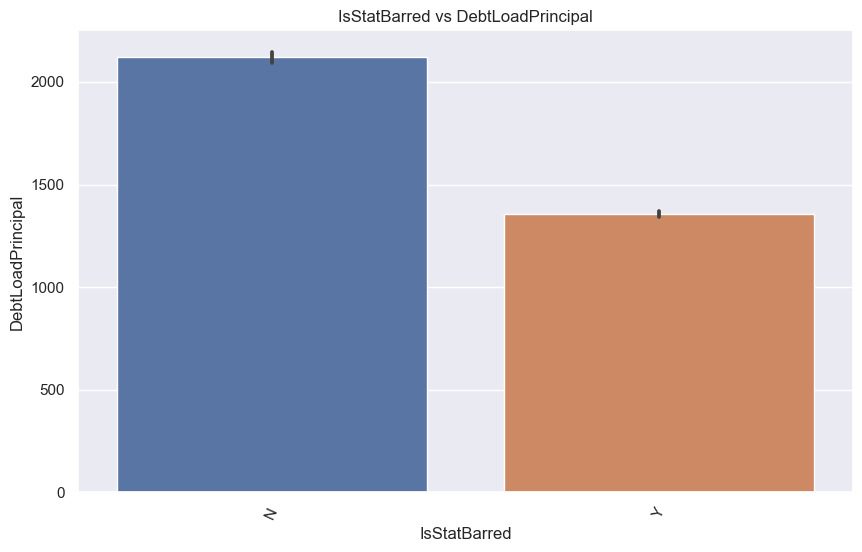

************************************************************************************************************************


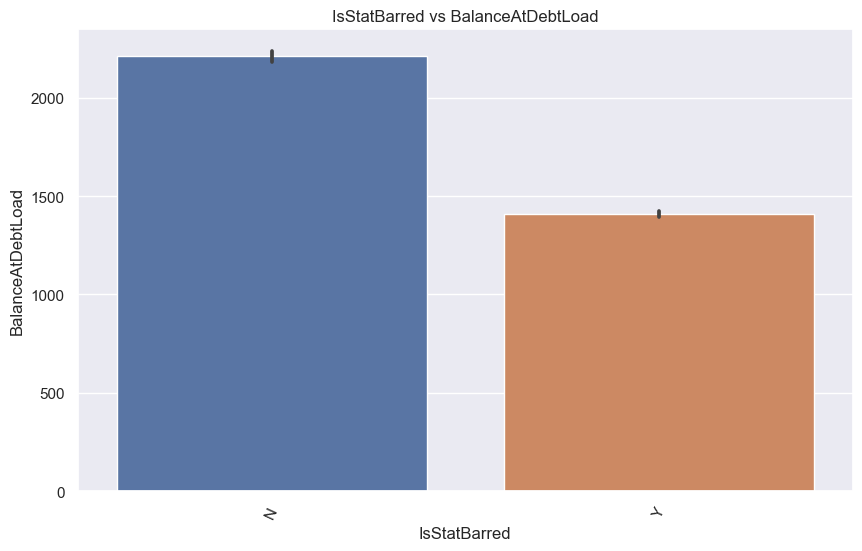

************************************************************************************************************************


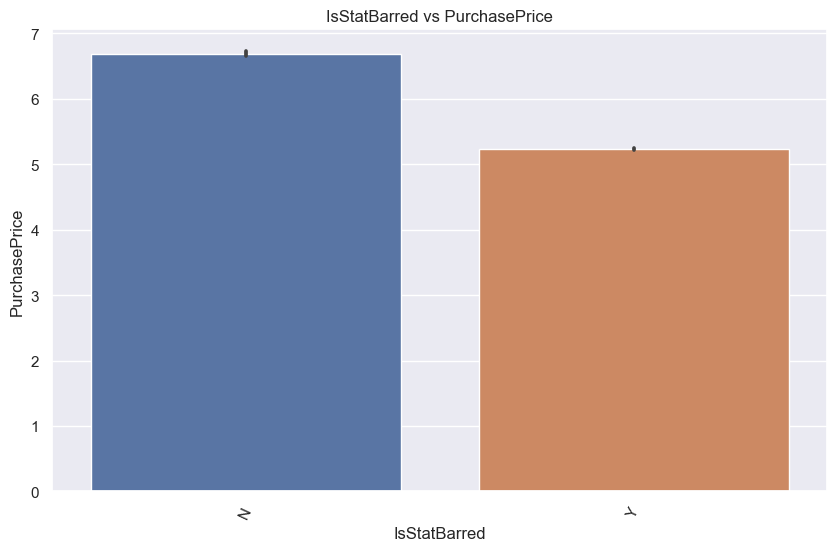

************************************************************************************************************************


In [81]:
categorical_columns = ['ProductOrDebtType','CollectionStatus', 'IsStatBarred']
# List of numerical columns
numerical_columns = ['CurrentBalance', 'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice']

# Iterate through each combination of categorical and numerical columns
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

        # Create a bar plot with "mean" estimator
        sns.barplot(x=cat_col, y=num_col, data=df, estimator=np.mean)

        # Add labels and title
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.title(f"{cat_col} vs {num_col}")

        # Rotate x-axis labels for better readability (if needed)
        plt.xticks(rotation=65)

        plt.show()
        
        print("*" * 120)
